# Understanding Gene Relationships through Various Network Visualization Approaches

In [17]:
import pandas as pd

In [18]:
from statistics import *

In [19]:
import netrd as net

In [20]:
from scipy import stats

In [21]:
import random

In [22]:
from datetime import datetime

In [23]:
# viz:
import seaborn as sns
import matplotlib.pyplot as plt

## Achilles Data
Source: [DepMap](https://depmap.org/portal/achilles/)

Download portal: [Achilles](https://depmap.org/portal/download/all/)

## Gene Effect (NNMD - Null-Normalized Mean Difference)

In [24]:
start_time = datetime.now()
gene_effect = pd.read_csv('data/achilles_gene_effect.csv',index_col=0)
print('elapsed time:', datetime.now() - start_time)

elapsed time: 0:00:08.490045


In [25]:
gene_effect.shape

(625, 18333)

In [26]:
gene_effect.head(5)

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
ACH-000004,0.168684,0.089128,-0.196966,-0.021260,0.038541,-0.175141,0.349346,-0.441008,0.291208,0.147993,...,-0.135665,-0.461810,NaN,NaN,0.253495,0.233904,-0.406140,0.283878,0.230978,-0.135112
ACH-000005,-0.068759,0.218792,0.178252,0.158390,-0.193862,-0.324566,0.246220,-0.576495,-0.081217,0.016182,...,-0.176432,-0.391199,-0.182117,-0.108978,0.186545,-0.075884,-0.095781,0.029269,0.000945,-0.242038
ACH-000007,0.053893,0.081444,-0.060170,0.153435,0.087362,0.150684,0.061146,-0.470462,-0.012210,0.277616,...,-0.101852,-0.276755,-0.030821,0.121126,0.214875,-0.019300,-0.342632,0.083610,-0.392722,-0.443380
ACH-000009,0.059874,-0.011153,-0.054367,0.060886,0.039767,0.043527,0.011845,-0.630290,0.161797,0.033587,...,-0.355880,-0.290047,-0.031825,0.115886,0.116784,0.035294,-0.575523,0.228940,-0.114559,-0.549906
ACH-000011,0.277165,0.085354,0.007972,0.445843,-0.036717,-0.261409,0.111173,-0.430867,0.138193,0.120785,...,-0.418769,-0.518908,-0.128187,-0.126336,0.269698,0.148516,-0.227106,0.120656,-0.252444,-0.401821
ACH-000012,0.008073,0.167177,0.088705,0.307599,0.015440,-0.137284,0.264126,-0.491951,0.073552,0.308495,...,-0.393597,-0.834722,0.062316,-0.045060,0.133700,0.122965,-0.132978,0.050321,-0.175689,-0.402526
ACH-000013,0.062131,0.038687,-0.043841,0.200285,-0.070484,-0.072263,0.058271,-0.474665,0.031876,0.268895,...,0.008042,0.124692,-0.058500,-0.040608,0.238244,-0.030644,-0.172263,0.145374,-0.206768,-0.540681
ACH-000014,0.143078,-0.035837,0.010997,0.182625,-0.034048,-0.100745,-0.147548,-0.478343,-0.073118,0.163341,...,-0.193486,-0.932615,NaN,NaN,-0.065987,0.024524,-0.191035,-0.059532,0.220589,-0.328847
ACH-000015,-0.090890,0.007894,-0.185690,0.111529,-0.033507,-0.120201,0.240126,-0.369685,0.164322,0.232466,...,-0.103288,-0.237725,-0.048158,-0.014440,0.334302,0.178671,-0.271045,0.178024,-0.278946,-0.207964
ACH-000017,0.178427,0.106952,-0.068145,0.109807,-0.195903,-0.129935,0.255632,-0.368921,0.013102,0.174521,...,-0.174715,-0.646525,-0.042260,0.221313,0.097621,0.096192,-0.224735,0.256629,-0.293197,-0.244157


In [27]:
stats.describe(gene_effect[random.choice(list(gene_effect.columns))])

DescribeResult(nobs=625, minmax=(-0.357123720145, 0.41514781769299997), mean=0.0927052518237865, variance=0.009430720189636997, skewness=-0.2843850160768815, kurtosis=1.2908797816368738)

Visualizing NNMD Distributions of 100 random genes from gene_effect data


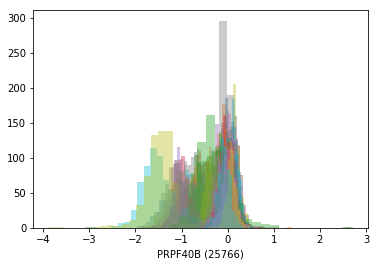

In [28]:
print('Visualizing NNMD Distributions of 100 random genes from gene_effect data')
for g in random.sample(list(gene_effect.columns), 100):
    sns.distplot(gene_effect[g].fillna(0),bins=20,kde=False)

In [29]:
gene_effect.min().min()

-4.4923381539

In [30]:
gene_effect.min().sort_values(ascending=True).head(5)

RAN (5901)          -4.492338
BUB3 (9184)         -3.961129
HIST2H3A (333932)   -3.888375
HSPE1 (3336)        -3.634067
EEF2 (1938)         -3.522135
dtype: float64

In [31]:
gene_effect.max().max()

6.384527418539999

In [32]:
gene_effect.max().sort_values(ascending=False).head(5)

PTEN (5728)         6.384527
TP53 (7157)         4.831093
ARRDC3 (57561)      3.974578
GPAT4 (137964)      3.070844
NPIPB15 (440348)    3.054422
dtype: float64

In [33]:
pd.DataFrame(gene_effect.dtypes)

,0
A1BG (1),float64
A1CF (29974),float64
A2M (2),float64
A2ML1 (144568),float64
A3GALT2 (127550),float64


## Gene Dependency
**Note:** We chose to use the `gene dependency` data set instead of the `gene effect` data set because the `gene effect` data set is the CERES score with a Null-Normalized Mean Difference (difference from the null model of cell line survival), whereas the `gene dependency` data set is a simple probability ( 0 < p < 1 ) of importance from the null model of cell line survival. Learn more at the [DepMap FAQs](https://depmap.org/portal/faq/)

In [34]:
start_time = datetime.now()
gene_dep = pd.read_csv('data/achilles_gene_dependency.csv',index_col=0)
print('elapsed time:', datetime.now() - start_time)

elapsed time: 0:00:08.218925


In [35]:
gene_dep.shape

(625, 18333)

In [36]:
gene_dep.head(10)

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
ACH-000004,0.001451,0.004520,0.102872,0.018067,0.008767,0.085647,0.000065,0.431382,0.000192,0.001974,...,0.060016,0.465022,NaN,NaN,0.000372,0.000517,0.374798,0.000220,0.000541,0.059707
ACH-000005,0.026104,0.001092,0.001859,0.002384,0.073250,0.175472,0.000745,0.528323,0.029178,0.011600,...,0.064166,0.252776,0.067042,0.037138,0.001671,0.027810,0.033134,0.010160,0.013513,0.103597
ACH-000007,0.004364,0.003030,0.017460,0.001112,0.002801,0.001155,0.003964,0.432981,0.009979,0.000158,...,0.027625,0.137708,0.012447,0.001760,0.000440,0.010849,0.219132,0.002946,0.296057,0.383729
ACH-000009,0.002986,0.008234,0.014550,0.002942,0.004015,0.003802,0.005994,0.671296,0.000620,0.004395,...,0.240007,0.154809,0.010861,0.001271,0.001252,0.004284,0.592691,0.000227,0.030041,0.552916
ACH-000011,0.000254,0.003716,0.009770,0.000015,0.016456,0.131691,0.002650,0.350667,0.001843,0.002332,...,0.331856,0.493477,0.042943,0.042179,0.000285,0.001603,0.101851,0.002336,0.123363,0.306065
ACH-000012,0.006585,0.000650,0.002101,0.000076,0.005949,0.039098,0.000148,0.496048,0.002616,0.000075,...,0.316770,0.903348,0.003081,0.013213,0.001073,0.001261,0.037322,0.003660,0.058364,0.332458
ACH-000013,0.004887,0.006845,0.020258,0.000569,0.027806,0.028374,0.005170,0.505162,0.007531,0.000194,...,0.010434,0.001892,0.024174,0.019491,0.000312,0.017229,0.079498,0.001365,0.107523,0.619927
ACH-000014,0.001156,0.012898,0.007196,0.000637,0.012610,0.027250,0.044594,0.451602,0.019987,0.000854,...,0.069487,0.932838,NaN,NaN,0.018422,0.006032,0.067962,0.017100,0.000352,0.204259
ACH-000015,0.026106,0.007272,0.072215,0.001568,0.012737,0.036572,0.000224,0.290348,0.000692,0.000250,...,0.030156,0.115563,0.015421,0.009875,0.000063,0.000555,0.151136,0.000561,0.160490,0.089013
ACH-000017,0.000980,0.002869,0.028000,0.002748,0.100577,0.054300,0.000285,0.322310,0.010416,0.001041,...,0.083403,0.715688,0.020735,0.000497,0.003282,0.003351,0.127736,0.000280,0.209408,0.148503


Visualizing Probability Distributions of 100 random genes from gene_dependency data


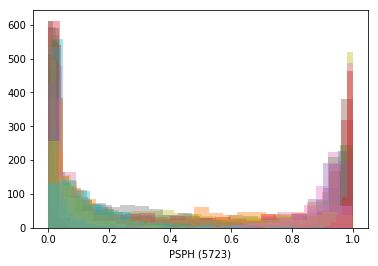

In [37]:
print('Visualizing Probability Distributions of 100 random genes from gene_dependency data')
for g in random.sample(list(gene_dep.columns), 100):
    sns.distplot(gene_dep[g].fillna(0),bins=20,kde=False)

In [38]:
gene_dep.min().sort_values(ascending=True).head(5)

IL33 (90865)       0.0
TLR5 (7100)        0.0
GJA1 (2697)        0.0
GIMAP4 (55303)     0.0
GGTLC3 (728226)    0.0
dtype: float64

In [39]:
gene_dep.max().sort_values(ascending=False).head(5)

CHMP3 (51652)     1.0
RPL12 (6136)      1.0
RPAP2 (79871)     1.0
CHMP6 (79643)     1.0
SMARCB1 (6598)    1.0
dtype: float64

## DepMap Cell Line Metadata

In [40]:
cell_lines = pd.read_csv('data/depmap-2019q1-celllines_v2.csv',index_col=0)

In [41]:
cell_lines.head(5)

,CCLE_Name,Aliases,COSMIC_ID,Sanger ID,Primary Disease,Subtype Disease,Gender,Source
DepMap_ID,,,,,,,,
ACH-000001,NIHOVCAR3_OVARY,NIH:OVCAR-3;OVCAR3,905933.0,2201.0,Ovarian Cancer,"Adenocarcinoma, high grade serous",Female,ATCC
ACH-000002,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HL-60,905938.0,55.0,Leukemia,"Acute Myelogenous Leukemia (AML), M3 (Promyelo...",Female,ATCC
ACH-000003,CACO2_LARGE_INTESTINE,CACO2;CACO2;CaCo-2,NaN,NaN,Colon/Colorectal Cancer,Colon Adenocarcinoma,-1,NaN
ACH-000004,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HEL,907053.0,783.0,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",Male,DSMZ
ACH-000005,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HEL 92.1.7,NaN,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",Male,ATCC


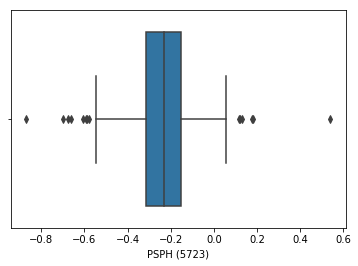

In [44]:
sns.boxplot(gene_effect[g].reset_index()[g])

In [45]:
lines_in_ge = list(gene_effect.index)

In [47]:
# Filter cell lines metadata to only cell lines in the gene effect dataset
metadata = cell_lines[cell_lines.index.isin(list(gene_effect.index))]

In [48]:
metadata.to_pickle('data/filtered_cell_lines_metadata.pkl')

**Code rest stop: load filtered metadata**

In [49]:
metadata = pd.read_pickle('data/filtered_cell_lines_metadata.pkl')

In [50]:
metadata.columns

Index(['CCLE_Name', 'Aliases', 'COSMIC_ID', 'Sanger ID', 'Primary Disease',
       'Subtype Disease', 'Gender', 'Source'],
      dtype='object')

In [51]:
metadata.shape

(622, 8)

In [52]:
diseases = pd.DataFrame(metadata.groupby('Primary Disease').size().sort_values(ascending=False),columns=(['cell_line_count']))
diseases.shape

(28, 1)

<BarContainer object of 28 artists>

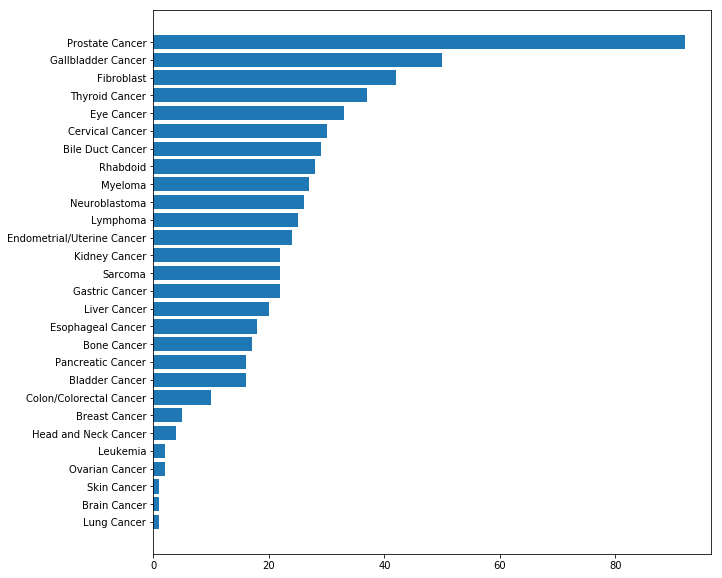

In [77]:
plt.rcParams["figure.figsize"] = (10,10)
plt.barh(diseases.index,diseases['cell_line_count'].sort_values(ascending=True))

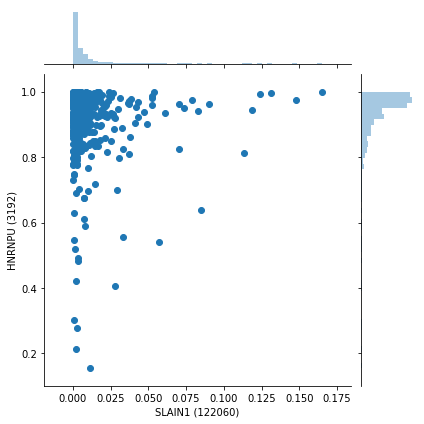

In [54]:
x=random.choice(list(gene_dep.columns))
y=random.choice(list(gene_dep.columns))
g = sns.jointplot(x=x, y=y, data=gene_dep)
g.set_axis_labels(x,y)

## Gene Dependency Ranks by Cell Line

In [55]:
ranks = pd.DataFrame(index=gene_dep.columns, columns=list(gene_dep.index))

In [56]:
cell_line = random.choice(list(gene_dep.index))
gene = random.choice(list(gene_dep.columns))
gene_dep.loc[cell_line].rank().head(10)

A1BG (1)             4889.0
A1CF (29974)         3361.0
A2M (2)              9206.0
A2ML1 (144568)       3274.0
A3GALT2 (127550)    11062.0
A4GALT (53947)       3784.0
A4GNT (51146)        3751.0
AAAS (8086)         16127.0
AACS (65985)         5502.0
AADAC (13)            755.0
Name: ACH-001061, dtype: float64

In [57]:
# Calculate gene dependency ranks for each cell line
start_time = datetime.now()
i=1
r=list(gene_dep.index)
l=len(r)
for cell_line in r:
    print('analyzing cell line',cell_line,i,"of",l)
    ranks[cell_line]=gene_dep.loc[cell_line].rank()
    i+=1
print('elapsed time:', datetime.now() - start_time)

analyzing cell line ACH-000004 1 of 625
analyzing cell line ACH-000005 2 of 625
analyzing cell line ACH-000007 3 of 625
analyzing cell line ACH-000009 4 of 625
analyzing cell line ACH-000011 5 of 625
analyzing cell line ACH-000012 6 of 625
analyzing cell line ACH-000013 7 of 625
analyzing cell line ACH-000014 8 of 625
analyzing cell line ACH-000015 9 of 625
analyzing cell line ACH-000017 10 of 625
analyzing cell line ACH-000018 11 of 625
analyzing cell line ACH-000019 12 of 625
analyzing cell line ACH-000021 13 of 625
analyzing cell line ACH-000022 14 of 625
analyzing cell line ACH-000025 15 of 625
analyzing cell line ACH-000028 16 of 625
analyzing cell line ACH-000029 17 of 625
analyzing cell line ACH-000030 18 of 625
analyzing cell line ACH-000035 19 of 625
analyzing cell line ACH-000036 20 of 625
analyzing cell line ACH-000037 21 of 625
analyzing cell line ACH-000039 22 of 625
analyzing cell line ACH-000040 23 of 625
analyzing cell line ACH-000041 24 of 625
analyzing cell line ACH-0

analyzing cell line ACH-000414 200 of 625
analyzing cell line ACH-000415 201 of 625
analyzing cell line ACH-000416 202 of 625
analyzing cell line ACH-000420 203 of 625
analyzing cell line ACH-000421 204 of 625
analyzing cell line ACH-000422 205 of 625
analyzing cell line ACH-000424 206 of 625
analyzing cell line ACH-000425 207 of 625
analyzing cell line ACH-000426 208 of 625
analyzing cell line ACH-000427 209 of 625
analyzing cell line ACH-000433 210 of 625
analyzing cell line ACH-000434 211 of 625
analyzing cell line ACH-000436 212 of 625
analyzing cell line ACH-000437 213 of 625
analyzing cell line ACH-000444 214 of 625
analyzing cell line ACH-000445 215 of 625
analyzing cell line ACH-000448 216 of 625
analyzing cell line ACH-000450 217 of 625
analyzing cell line ACH-000452 218 of 625
analyzing cell line ACH-000454 219 of 625
analyzing cell line ACH-000458 220 of 625
analyzing cell line ACH-000459 221 of 625
analyzing cell line ACH-000460 222 of 625
analyzing cell line ACH-000461 223

analyzing cell line ACH-000791 398 of 625
analyzing cell line ACH-000792 399 of 625
analyzing cell line ACH-000793 400 of 625
analyzing cell line ACH-000794 401 of 625
analyzing cell line ACH-000796 402 of 625
analyzing cell line ACH-000799 403 of 625
analyzing cell line ACH-000800 404 of 625
analyzing cell line ACH-000801 405 of 625
analyzing cell line ACH-000802 406 of 625
analyzing cell line ACH-000804 407 of 625
analyzing cell line ACH-000805 408 of 625
analyzing cell line ACH-000809 409 of 625
analyzing cell line ACH-000810 410 of 625
analyzing cell line ACH-000811 411 of 625
analyzing cell line ACH-000817 412 of 625
analyzing cell line ACH-000819 413 of 625
analyzing cell line ACH-000820 414 of 625
analyzing cell line ACH-000821 415 of 625
analyzing cell line ACH-000822 416 of 625
analyzing cell line ACH-000823 417 of 625
analyzing cell line ACH-000824 418 of 625
analyzing cell line ACH-000827 419 of 625
analyzing cell line ACH-000829 420 of 625
analyzing cell line ACH-000831 421

analyzing cell line ACH-001496 594 of 625
analyzing cell line ACH-001500 595 of 625
analyzing cell line ACH-001521 596 of 625
analyzing cell line ACH-001522 597 of 625
analyzing cell line ACH-001523 598 of 625
analyzing cell line ACH-001524 599 of 625
analyzing cell line ACH-001529 600 of 625
analyzing cell line ACH-001532 601 of 625
analyzing cell line ACH-001536 602 of 625
analyzing cell line ACH-001550 603 of 625
analyzing cell line ACH-001552 604 of 625
analyzing cell line ACH-001554 605 of 625
analyzing cell line ACH-001555 606 of 625
analyzing cell line ACH-001563 607 of 625
analyzing cell line ACH-001566 608 of 625
analyzing cell line ACH-001568 609 of 625
analyzing cell line ACH-001645 610 of 625
analyzing cell line ACH-001647 611 of 625
analyzing cell line ACH-001650 612 of 625
analyzing cell line ACH-001654 613 of 625
analyzing cell line ACH-001715 614 of 625
analyzing cell line ACH-001735 615 of 625
analyzing cell line ACH-001736 616 of 625
analyzing cell line ACH-001737 617

In [59]:
ranks

,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000017,...,ACH-001736,ACH-001737,ACH-001740,ACH-001745,ACH-001750,ACH-001765,ACH-001814,ACH-001838,ACH-001956,ACH-001957
A1BG (1),2157.0,9283.0,5974.0,4547.0,726.0,6645.0,4814.0,2770.0,10265.0,2005.0,...,2263.0,8525.0,6952.0,1150.0,5339.0,2401.0,2387.0,9692.0,10047.0,4749.0
A1CF (29974),4097.0,2151.0,5117.0,6972.0,4673.0,1772.0,5660.0,7878.0,6771.0,3759.0,...,6572.0,3726.0,298.0,2155.0,2890.0,6289.0,11554.0,4134.0,2873.0,6567.0
A2M (2),12337.0,2862.0,9501.0,8510.0,7230.0,3804.0,8849.0,6429.0,12913.0,9835.0,...,11600.0,9162.0,12895.0,11569.0,9665.0,10940.0,13219.0,11490.0,6062.0,4342.0
A2ML1 (144568),7531.0,3271.0,3164.0,4521.0,110.0,257.0,1096.0,1930.0,3348.0,3683.0,...,5372.0,5305.0,1319.0,1853.0,2738.0,4210.0,6047.0,773.0,858.0,1154.0
A3GALT2 (127550),5630.0,12276.0,4953.0,5208.0,8739.0,6374.0,9834.0,7816.0,8266.0,13207.0,...,13344.0,4162.0,8927.0,11428.0,12201.0,11227.0,4192.0,8704.0,10192.0,8376.0
A4GALT (53947),11884.0,14512.0,3245.0,5093.0,14123.0,11503.0,9907.0,9876.0,11204.0,11675.0,...,5271.0,14745.0,8225.0,9918.0,14436.0,4387.0,5051.0,14217.0,6912.0,11235.0
A4GNT (51146),271.0,1750.0,5756.0,6179.0,3926.0,501.0,4946.0,11114.0,836.0,775.0,...,1085.0,4813.0,9051.0,3304.0,3239.0,7420.0,11754.0,641.0,2760.0,11189.0
AAAS (8086),15200.0,16384.0,15938.0,16602.0,15741.0,16134.0,16105.0,15332.0,15544.0,15391.0,...,16314.0,16352.0,16505.0,16284.0,16747.0,16073.0,15689.0,16318.0,15923.0,16218.0
AACS (65985),552.0,9608.0,7993.0,1944.0,3143.0,4269.0,5921.0,9121.0,1969.0,6866.0,...,4693.0,2212.0,8110.0,3702.0,5159.0,9717.0,7085.0,2303.0,6047.0,2947.0
AADAC (13),2597.0,6913.0,1046.0,5444.0,3631.0,250.0,380.0,2331.0,921.0,2074.0,...,2098.0,5349.0,3670.0,3874.0,9135.0,1959.0,4492.0,461.0,1260.0,897.0


In [60]:
ranks.to_pickle('data/gene_dependency_ranks.pkl')

**Code rest stop: read in ranks**

In [61]:
ranks = pd.read_pickle('data/gene_dependency_ranks.pkl')

In [62]:
random.sample(list(ranks.index), 10)

['NLGN4X (57502)',
 'KCNJ2 (3759)',
 'ERCC1 (2067)',
 'TOPAZ1 (375337)',
 'CYP17A1 (1586)',
 'DQX1 (165545)',
 'C5orf51 (285636)',
 'MCRIP2 (84331)',
 'HSP90B1 (7184)',
 'NCAPG (64151)']

In [63]:
ranks.head()

,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000017,...,ACH-001736,ACH-001737,ACH-001740,ACH-001745,ACH-001750,ACH-001765,ACH-001814,ACH-001838,ACH-001956,ACH-001957
A1BG (1),2157.0,9283.0,5974.0,4547.0,726.0,6645.0,4814.0,2770.0,10265.0,2005.0,...,2263.0,8525.0,6952.0,1150.0,5339.0,2401.0,2387.0,9692.0,10047.0,4749.0
A1CF (29974),4097.0,2151.0,5117.0,6972.0,4673.0,1772.0,5660.0,7878.0,6771.0,3759.0,...,6572.0,3726.0,298.0,2155.0,2890.0,6289.0,11554.0,4134.0,2873.0,6567.0
A2M (2),12337.0,2862.0,9501.0,8510.0,7230.0,3804.0,8849.0,6429.0,12913.0,9835.0,...,11600.0,9162.0,12895.0,11569.0,9665.0,10940.0,13219.0,11490.0,6062.0,4342.0
A2ML1 (144568),7531.0,3271.0,3164.0,4521.0,110.0,257.0,1096.0,1930.0,3348.0,3683.0,...,5372.0,5305.0,1319.0,1853.0,2738.0,4210.0,6047.0,773.0,858.0,1154.0
A3GALT2 (127550),5630.0,12276.0,4953.0,5208.0,8739.0,6374.0,9834.0,7816.0,8266.0,13207.0,...,13344.0,4162.0,8927.0,11428.0,12201.0,11227.0,4192.0,8704.0,10192.0,8376.0


Visualizing Rank Distributions of 100 random genes from gene_dependency data


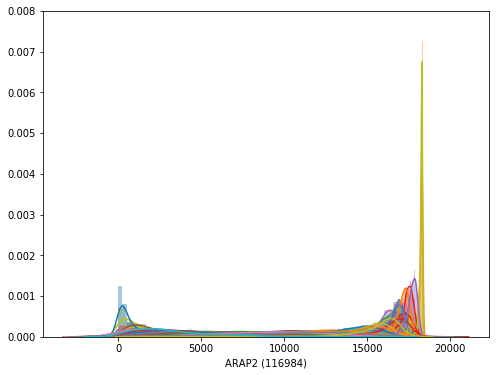

In [78]:
print('Visualizing Rank Distributions of 100 random genes from gene_dependency data')
for g in random.sample(list(ranks.index), 100):
    plt.rcParams["figure.figsize"] = (8,6)
    sns.distplot(ranks.loc[g].fillna(0))

In [79]:
from statistics import variance,mean,median

In [80]:
import numpy as np

In [81]:
median(ranks.loc['A4GALT (53947)'])

8446.0

In [82]:
ranks.loc['A4GALT (53947)'].std()

3230.1551331722408

In [83]:
stats = pd.DataFrame(index=ranks.index,columns=['std','mean','median'])

In [84]:
stats['std']=[ranks.loc[g].std() for g in stats.index]

In [85]:
stats['mean']=[np.nanmean(ranks.loc[g]) for g in stats.index]

In [86]:
stats['median']=[median(ranks.loc[g]) for g in stats.index]

In [113]:
stats.to_pickle('data/gene_dependency_rank_stats.pkl')
stats.to_csv('data/gene_dependency_rank_stats.csv')

In [88]:
stats.head(10)

,std,mean,median
A1BG (1),3035.358185,4427.3760,3753.0
A1CF (29974),3055.178004,5107.5984,4626.0
A2M (2),2897.901026,8900.2928,9198.0
A2ML1 (144568),2210.593643,2611.4336,1881.0
A3GALT2 (127550),3425.762390,8661.8576,8722.0
A4GALT (53947),3230.155133,8380.8560,8446.0
A4GNT (51146),2786.912939,4287.8800,3817.0
AAAS (8086),1101.659548,15899.6800,16130.0
AACS (65985),3159.182321,4988.8080,4520.0
AADAC (13),2871.518983,3385.7344,2642.0


In [112]:
stats.head(10).sort_values(by='mean', ascending=True)

,std,mean,median
A2ML1 (144568),2210.593643,2611.4336,1881.0
AADAC (13),2871.518983,3385.7344,2642.0
A4GNT (51146),2786.912939,4287.8800,3817.0
A1BG (1),3035.358185,4427.3760,3753.0
AACS (65985),3159.182321,4988.8080,4520.0
A1CF (29974),3055.178004,5107.5984,4626.0
A4GALT (53947),3230.155133,8380.8560,8446.0
A3GALT2 (127550),3425.762390,8661.8576,8722.0
A2M (2),2897.901026,8900.2928,9198.0
AAAS (8086),1101.659548,15899.6800,16130.0


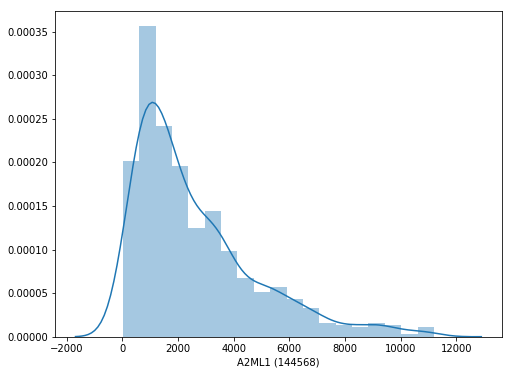

In [111]:
sns.distplot(ranks.loc['A2ML1 (144568)'].fillna(0))

**Mean of rank distribution**

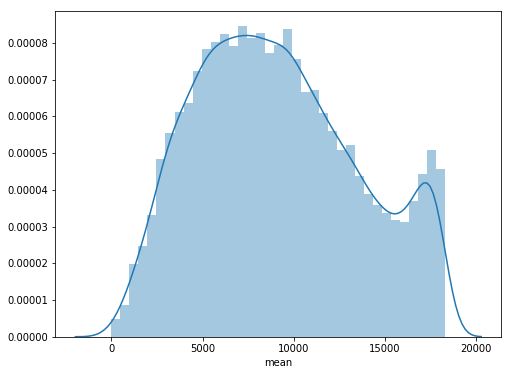

In [89]:
sns.distplot(stats['mean'].fillna(0))

**Median of rank distribution**

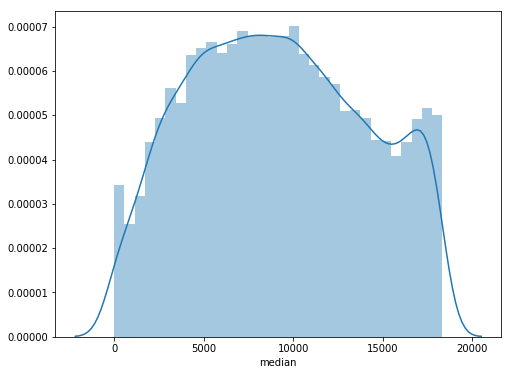

In [90]:
sns.distplot(stats['median'].fillna(0))

**Standard Deviation of rank distribution**

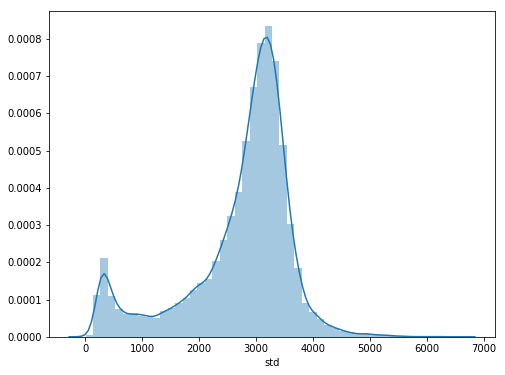

In [91]:
sns.distplot(stats['std'].fillna(0))

## Calculating Correlation Matrix for Cell Lines

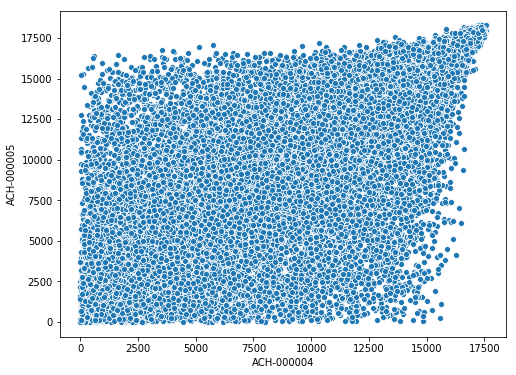

In [92]:
sns.scatterplot(x=ranks['ACH-000004'],y=ranks['ACH-000005'])

In [93]:
correlation_matrix = ranks[ranks.columns].corr()
correlation_matrix.head(5)

,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000017,...,ACH-001736,ACH-001737,ACH-001740,ACH-001745,ACH-001750,ACH-001765,ACH-001814,ACH-001838,ACH-001956,ACH-001957
ACH-000004,1.000000,0.629261,0.624370,0.666333,0.630026,0.693843,0.695018,0.636527,0.682450,0.658235,...,0.680178,0.490510,0.674620,0.677290,0.659535,0.696404,0.584281,0.646931,0.714480,0.662700
ACH-000005,0.629261,1.000000,0.578286,0.603746,0.614765,0.642996,0.654375,0.589318,0.635134,0.624684,...,0.640137,0.468637,0.600251,0.631651,0.630577,0.657242,0.557930,0.610678,0.661086,0.635976
ACH-000007,0.624370,0.578286,1.000000,0.683612,0.656175,0.693404,0.694829,0.639489,0.687276,0.665113,...,0.667659,0.476004,0.655168,0.676164,0.666603,0.689267,0.598315,0.660279,0.714157,0.680490
ACH-000009,0.666333,0.603746,0.683612,1.000000,0.681248,0.766020,0.751206,0.686143,0.744758,0.702650,...,0.699709,0.517902,0.692505,0.722090,0.703546,0.747048,0.633466,0.689536,0.769797,0.742583
ACH-000011,0.630026,0.614765,0.656175,0.681248,1.000000,0.711702,0.732991,0.677653,0.701527,0.694800,...,0.694069,0.528279,0.673673,0.697370,0.717578,0.736599,0.637298,0.703216,0.755500,0.745994


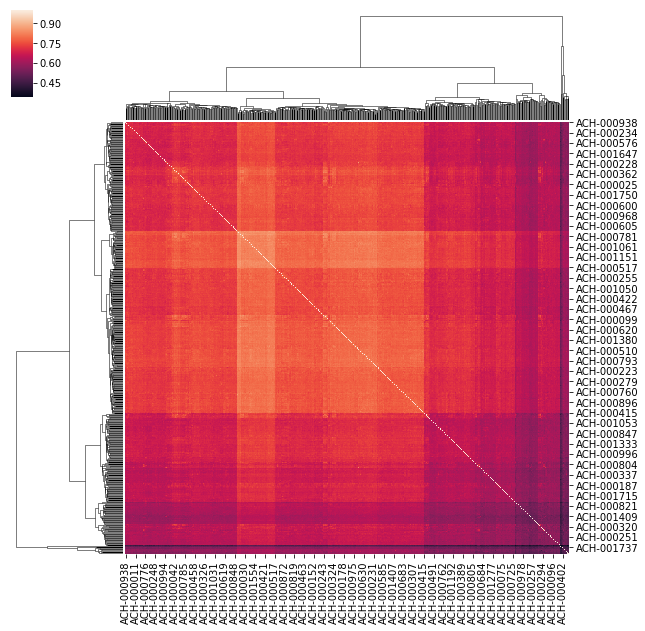

In [94]:
sns.clustermap(correlation_matrix)

# [This code continues on Google Collab here](https://colab.research.google.com/drive/1MJbvuvzVhiKs9dUJj78jkldzDDZl_W7c)

## Cell Line Ranks by Gene Dependency

In [98]:
cell_line_ranks = pd.DataFrame(index=list(gene_dep.index), columns=gene_dep.columns)

In [99]:
cell_line = random.choice(list(gene_dep.index))
gene = random.choice(list(gene_dep.columns))
gene_dep[gene].rank().head(10)

ACH-000004     33.0
ACH-000005    617.0
ACH-000007    458.0
ACH-000009    454.0
ACH-000011    498.0
ACH-000012    405.0
ACH-000013    524.0
ACH-000014    334.0
ACH-000015    594.0
ACH-000017    171.0
Name: B9D2 (80776), dtype: float64

In [102]:
# Calculate gene dependency ranks for each cell line
start_time = datetime.now()
i=1
genes=list(gene_dep.columns)
l=len(genes)
for gene in genes:
    print('analyzing gene',gene,i,"of",l)
    cell_line_ranks[gene]=gene_dep[gene].rank()
    i+=1
print('elapsed time:', datetime.now() - start_time)

analyzing gene A1BG (1) 1 of 18333
analyzing gene A1CF (29974) 2 of 18333
analyzing gene A2M (2) 3 of 18333
analyzing gene A2ML1 (144568) 4 of 18333
analyzing gene A3GALT2 (127550) 5 of 18333
analyzing gene A4GALT (53947) 6 of 18333
analyzing gene A4GNT (51146) 7 of 18333
analyzing gene AAAS (8086) 8 of 18333
analyzing gene AACS (65985) 9 of 18333
analyzing gene AADAC (13) 10 of 18333
analyzing gene AADACL2 (344752) 11 of 18333
analyzing gene AADACL3 (126767) 12 of 18333
analyzing gene AADACL4 (343066) 13 of 18333
analyzing gene AADAT (51166) 14 of 18333
analyzing gene AAED1 (195827) 15 of 18333
analyzing gene AAGAB (79719) 16 of 18333
analyzing gene AAK1 (22848) 17 of 18333
analyzing gene AAMDC (28971) 18 of 18333
analyzing gene AAMP (14) 19 of 18333
analyzing gene AANAT (15) 20 of 18333
analyzing gene AAR2 (25980) 21 of 18333
analyzing gene AARD (441376) 22 of 18333
analyzing gene AARS (16) 23 of 18333
analyzing gene AARS2 (57505) 24 of 18333
analyzing gene AARSD1 (80755) 25 of 18333

/anaconda/lib/python3.6/site-packages/pandas/core/internals.py:389: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
  self.values = np.delete(self.values, loc, 0)
/anaconda/lib/python3.6/site-packages/pandas/core/internals.py:390: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
  self.mgr_locs = self.mgr_locs.delete(loc)


analyzing gene ABHD10 (55347) 78 of 18333
analyzing gene ABHD11 (83451) 79 of 18333
analyzing gene ABHD12 (26090) 80 of 18333
analyzing gene ABHD12B (145447) 81 of 18333
analyzing gene ABHD13 (84945) 82 of 18333
analyzing gene ABHD14A (25864) 83 of 18333
analyzing gene ABHD14B (84836) 84 of 18333
analyzing gene ABHD15 (116236) 85 of 18333
analyzing gene ABHD16A (7920) 86 of 18333
analyzing gene ABHD16B (140701) 87 of 18333
analyzing gene ABHD17A (81926) 88 of 18333
analyzing gene ABHD17B (51104) 89 of 18333
analyzing gene ABHD17C (58489) 90 of 18333
analyzing gene ABHD18 (80167) 91 of 18333
analyzing gene ABHD2 (11057) 92 of 18333
analyzing gene ABHD3 (171586) 93 of 18333
analyzing gene ABHD4 (63874) 94 of 18333
analyzing gene ABHD5 (51099) 95 of 18333
analyzing gene ABHD6 (57406) 96 of 18333
analyzing gene ABHD8 (79575) 97 of 18333
analyzing gene ABI1 (10006) 98 of 18333
analyzing gene ABI2 (10152) 99 of 18333
analyzing gene ABI3 (51225) 100 of 18333
analyzing gene ABI3BP (25890) 101 

analyzing gene ADD1 (118) 314 of 18333
analyzing gene ADD2 (119) 315 of 18333
analyzing gene ADD3 (120) 316 of 18333
analyzing gene ADGRA1 (84435) 317 of 18333
analyzing gene ADGRA2 (25960) 318 of 18333
analyzing gene ADGRA3 (166647) 319 of 18333
analyzing gene ADGRB1 (575) 320 of 18333
analyzing gene ADGRB2 (576) 321 of 18333
analyzing gene ADGRB3 (577) 322 of 18333
analyzing gene ADGRD1 (283383) 323 of 18333
analyzing gene ADGRE1 (2015) 324 of 18333
analyzing gene ADGRE2 (30817) 325 of 18333
analyzing gene ADGRE3 (84658) 326 of 18333
analyzing gene ADGRE5 (976) 327 of 18333
analyzing gene ADGRF1 (266977) 328 of 18333
analyzing gene ADGRF3 (165082) 329 of 18333
analyzing gene ADGRF4 (221393) 330 of 18333
analyzing gene ADGRF5 (221395) 331 of 18333
analyzing gene ADGRG1 (9289) 332 of 18333
analyzing gene ADGRG2 (10149) 333 of 18333
analyzing gene ADGRG3 (222487) 334 of 18333
analyzing gene ADGRG4 (139378) 335 of 18333
analyzing gene ADGRG5 (221188) 336 of 18333
analyzing gene ADGRG6 (5

analyzing gene ALDH7A1 (501) 545 of 18333
analyzing gene ALDH8A1 (64577) 546 of 18333
analyzing gene ALDH9A1 (223) 547 of 18333
analyzing gene ALDOA (226) 548 of 18333
analyzing gene ALDOB (229) 549 of 18333
analyzing gene ALDOC (230) 550 of 18333
analyzing gene ALG1 (56052) 551 of 18333
analyzing gene ALG10 (84920) 552 of 18333
analyzing gene ALG10B (144245) 553 of 18333
analyzing gene ALG11 (440138) 554 of 18333
analyzing gene ALG12 (79087) 555 of 18333
analyzing gene ALG13 (79868) 556 of 18333
analyzing gene ALG14 (199857) 557 of 18333
analyzing gene ALG1L (200810) 558 of 18333
analyzing gene ALG2 (85365) 559 of 18333
analyzing gene ALG3 (10195) 560 of 18333
analyzing gene ALG5 (29880) 561 of 18333
analyzing gene ALG6 (29929) 562 of 18333
analyzing gene ALG8 (79053) 563 of 18333
analyzing gene ALG9 (79796) 564 of 18333
analyzing gene ALK (238) 565 of 18333
analyzing gene ALKAL1 (389658) 566 of 18333
analyzing gene ALKAL2 (285016) 567 of 18333
analyzing gene ALKBH1 (8846) 568 of 1833

analyzing gene AP2S1 (1175) 785 of 18333
analyzing gene AP3B1 (8546) 786 of 18333
analyzing gene AP3B2 (8120) 787 of 18333
analyzing gene AP3D1 (8943) 788 of 18333
analyzing gene AP3M1 (26985) 789 of 18333
analyzing gene AP3M2 (10947) 790 of 18333
analyzing gene AP3S1 (1176) 791 of 18333
analyzing gene AP3S2 (10239) 792 of 18333
analyzing gene AP4B1 (10717) 793 of 18333
analyzing gene AP4E1 (23431) 794 of 18333
analyzing gene AP4M1 (9179) 795 of 18333
analyzing gene AP4S1 (11154) 796 of 18333
analyzing gene AP5B1 (91056) 797 of 18333
analyzing gene AP5M1 (55745) 798 of 18333
analyzing gene AP5S1 (55317) 799 of 18333
analyzing gene AP5Z1 (9907) 800 of 18333
analyzing gene APAF1 (317) 801 of 18333
analyzing gene APBA1 (320) 802 of 18333
analyzing gene APBA2 (321) 803 of 18333
analyzing gene APBA3 (9546) 804 of 18333
analyzing gene APBB1 (322) 805 of 18333
analyzing gene APBB1IP (54518) 806 of 18333
analyzing gene APBB2 (323) 807 of 18333
analyzing gene APBB3 (10307) 808 of 18333
analyzin

analyzing gene ARMC2 (84071) 1013 of 18333
analyzing gene ARMC3 (219681) 1014 of 18333
analyzing gene ARMC4 (55130) 1015 of 18333
analyzing gene ARMC5 (79798) 1016 of 18333
analyzing gene ARMC6 (93436) 1017 of 18333
analyzing gene ARMC7 (79637) 1018 of 18333
analyzing gene ARMC8 (25852) 1019 of 18333
analyzing gene ARMC9 (80210) 1020 of 18333
analyzing gene ARMCX1 (51309) 1021 of 18333
analyzing gene ARMCX2 (9823) 1022 of 18333
analyzing gene ARMCX3 (51566) 1023 of 18333
analyzing gene ARMCX4 (100131755) 1024 of 18333
analyzing gene ARMCX5 (64860) 1025 of 18333
analyzing gene ARMCX6 (54470) 1026 of 18333
analyzing gene ARMH1 (339541) 1027 of 18333
analyzing gene ARMH2 (101928603) 1028 of 18333
analyzing gene ARMH3 (79591) 1029 of 18333
analyzing gene ARMH4 (145407) 1030 of 18333
analyzing gene ARMS2 (387715) 1031 of 18333
analyzing gene ARMT1 (79624) 1032 of 18333
analyzing gene ARNT (405) 1033 of 18333
analyzing gene ARNT2 (9915) 1034 of 18333
analyzing gene ARNTL (406) 1035 of 18333


analyzing gene ATP6AP1L (92270) 1243 of 18333
analyzing gene ATP6AP2 (10159) 1244 of 18333
analyzing gene ATP6V0A1 (535) 1245 of 18333
analyzing gene ATP6V0A2 (23545) 1246 of 18333
analyzing gene ATP6V0A4 (50617) 1247 of 18333
analyzing gene ATP6V0B (533) 1248 of 18333
analyzing gene ATP6V0C (527) 1249 of 18333
analyzing gene ATP6V0D1 (9114) 1250 of 18333
analyzing gene ATP6V0D2 (245972) 1251 of 18333
analyzing gene ATP6V0E1 (8992) 1252 of 18333
analyzing gene ATP6V0E2 (155066) 1253 of 18333
analyzing gene ATP6V1A (523) 1254 of 18333
analyzing gene ATP6V1B1 (525) 1255 of 18333
analyzing gene ATP6V1B2 (526) 1256 of 18333
analyzing gene ATP6V1C1 (528) 1257 of 18333
analyzing gene ATP6V1C2 (245973) 1258 of 18333
analyzing gene ATP6V1D (51382) 1259 of 18333
analyzing gene ATP6V1E1 (529) 1260 of 18333
analyzing gene ATP6V1E2 (90423) 1261 of 18333
analyzing gene ATP6V1F (9296) 1262 of 18333
analyzing gene ATP6V1G1 (9550) 1263 of 18333
analyzing gene ATP6V1G2 (534) 1264 of 18333
analyzing gen

analyzing gene BEST2 (54831) 1476 of 18333
analyzing gene BEST3 (144453) 1477 of 18333
analyzing gene BEST4 (266675) 1478 of 18333
analyzing gene BET1 (10282) 1479 of 18333
analyzing gene BET1L (51272) 1480 of 18333
analyzing gene BEX1 (55859) 1481 of 18333
analyzing gene BEX2 (84707) 1482 of 18333
analyzing gene BEX3 (27018) 1483 of 18333
analyzing gene BEX4 (56271) 1484 of 18333
analyzing gene BEX5 (340542) 1485 of 18333
analyzing gene BFAR (51283) 1486 of 18333
analyzing gene BFSP1 (631) 1487 of 18333
analyzing gene BFSP2 (8419) 1488 of 18333
analyzing gene BGLAP (632) 1489 of 18333
analyzing gene BGN (633) 1490 of 18333
analyzing gene BHLHA15 (168620) 1491 of 18333
analyzing gene BHLHA9 (727857) 1492 of 18333
analyzing gene BHLHB9 (80823) 1493 of 18333
analyzing gene BHLHE22 (27319) 1494 of 18333
analyzing gene BHLHE23 (128408) 1495 of 18333
analyzing gene BHLHE40 (8553) 1496 of 18333
analyzing gene BHLHE41 (79365) 1497 of 18333
analyzing gene BHMT (635) 1498 of 18333
analyzing gen

analyzing gene C12orf10 (60314) 1713 of 18333
analyzing gene C12orf29 (91298) 1714 of 18333
analyzing gene C12orf4 (57102) 1715 of 18333
analyzing gene C12orf40 (283461) 1716 of 18333
analyzing gene C12orf42 (374470) 1717 of 18333
analyzing gene C12orf43 (64897) 1718 of 18333
analyzing gene C12orf45 (121053) 1719 of 18333
analyzing gene C12orf49 (79794) 1720 of 18333
analyzing gene C12orf50 (160419) 1721 of 18333
analyzing gene C12orf54 (121273) 1722 of 18333
analyzing gene C12orf56 (115749) 1723 of 18333
analyzing gene C12orf57 (113246) 1724 of 18333
analyzing gene C12orf60 (144608) 1725 of 18333
analyzing gene C12orf65 (91574) 1726 of 18333
analyzing gene C12orf66 (144577) 1727 of 18333
analyzing gene C12orf71 (728858) 1728 of 18333
analyzing gene C12orf73 (728568) 1729 of 18333
analyzing gene C12orf74 (338809) 1730 of 18333
analyzing gene C12orf75 (387882) 1731 of 18333
analyzing gene C12orf76 (400073) 1732 of 18333
analyzing gene C14orf119 (55017) 1733 of 18333
analyzing gene C14or

analyzing gene C6orf222 (389384) 1965 of 18333
analyzing gene C6orf223 (221416) 1966 of 18333
analyzing gene C6orf226 (441150) 1967 of 18333
analyzing gene C6orf47 (57827) 1968 of 18333
analyzing gene C6orf48 (50854) 1969 of 18333
analyzing gene C6orf52 (347744) 1970 of 18333
analyzing gene C6orf58 (352999) 1971 of 18333
analyzing gene C6orf62 (81688) 1972 of 18333
analyzing gene C6orf89 (221477) 1973 of 18333
analyzing gene C7 (730) 1974 of 18333
analyzing gene C7orf25 (79020) 1975 of 18333
analyzing gene C7orf26 (79034) 1976 of 18333
analyzing gene C7orf31 (136895) 1977 of 18333
analyzing gene C7orf33 (202865) 1978 of 18333
analyzing gene C7orf43 (55262) 1979 of 18333
analyzing gene C7orf50 (84310) 1980 of 18333
analyzing gene C7orf57 (136288) 1981 of 18333
analyzing gene C7orf61 (402573) 1982 of 18333
analyzing gene C8A (731) 1983 of 18333
analyzing gene C8B (732) 1984 of 18333
analyzing gene C8G (733) 1985 of 18333
analyzing gene C8orf33 (65265) 1986 of 18333
analyzing gene C8orf34

analyzing gene CASTOR1 (652968) 2212 of 18333
analyzing gene CASTOR2 (729438) 2213 of 18333
analyzing gene CASTOR3 (352954) 2214 of 18333
analyzing gene CASZ1 (54897) 2215 of 18333
analyzing gene CAT (847) 2216 of 18333
analyzing gene CATIP (375307) 2217 of 18333
analyzing gene CATSPER1 (117144) 2218 of 18333
analyzing gene CATSPER2 (117155) 2219 of 18333
analyzing gene CATSPER3 (347732) 2220 of 18333
analyzing gene CATSPER4 (378807) 2221 of 18333
analyzing gene CATSPERB (79820) 2222 of 18333
analyzing gene CATSPERD (257062) 2223 of 18333
analyzing gene CATSPERE (257044) 2224 of 18333
analyzing gene CATSPERG (57828) 2225 of 18333
analyzing gene CAV1 (857) 2226 of 18333
analyzing gene CAV2 (858) 2227 of 18333
analyzing gene CAV3 (859) 2228 of 18333
analyzing gene CAVIN1 (284119) 2229 of 18333
analyzing gene CAVIN2 (8436) 2230 of 18333
analyzing gene CAVIN3 (112464) 2231 of 18333
analyzing gene CAVIN4 (347273) 2232 of 18333
analyzing gene CBARP (255057) 2233 of 18333
analyzing gene CBFA2

analyzing gene CCNO (10309) 2465 of 18333
analyzing gene CCNT1 (904) 2466 of 18333
analyzing gene CCNT2 (905) 2467 of 18333
analyzing gene CCNY (219771) 2468 of 18333
analyzing gene CCNYL1 (151195) 2469 of 18333
analyzing gene CCP110 (9738) 2470 of 18333
analyzing gene CCPG1 (9236) 2471 of 18333
analyzing gene CCR1 (1230) 2472 of 18333
analyzing gene CCR10 (2826) 2473 of 18333
analyzing gene CCR2 (729230) 2474 of 18333
analyzing gene CCR3 (1232) 2475 of 18333
analyzing gene CCR4 (1233) 2476 of 18333
analyzing gene CCR5 (1234) 2477 of 18333
analyzing gene CCR6 (1235) 2478 of 18333
analyzing gene CCR7 (1236) 2479 of 18333
analyzing gene CCR8 (1237) 2480 of 18333
analyzing gene CCR9 (10803) 2481 of 18333
analyzing gene CCRL2 (9034) 2482 of 18333
analyzing gene CCS (9973) 2483 of 18333
analyzing gene CCSAP (126731) 2484 of 18333
analyzing gene CCSER1 (401145) 2485 of 18333
analyzing gene CCSER2 (54462) 2486 of 18333
analyzing gene CCT2 (10576) 2487 of 18333
analyzing gene CCT3 (7203) 2488 

analyzing gene CDRT15L2 (256223) 2712 of 18333
analyzing gene CDS1 (1040) 2713 of 18333
analyzing gene CDS2 (8760) 2714 of 18333
analyzing gene CDSN (1041) 2715 of 18333
analyzing gene CDT1 (81620) 2716 of 18333
analyzing gene CDV3 (55573) 2717 of 18333
analyzing gene CDX1 (1044) 2718 of 18333
analyzing gene CDX2 (1045) 2719 of 18333
analyzing gene CDX4 (1046) 2720 of 18333
analyzing gene CDYL (9425) 2721 of 18333
analyzing gene CDYL2 (124359) 2722 of 18333
analyzing gene CEACAM1 (634) 2723 of 18333
analyzing gene CEACAM16 (388551) 2724 of 18333
analyzing gene CEACAM19 (56971) 2725 of 18333
analyzing gene CEACAM21 (90273) 2726 of 18333
analyzing gene CEACAM3 (1084) 2727 of 18333
analyzing gene CEACAM4 (1089) 2728 of 18333
analyzing gene CEACAM5 (1048) 2729 of 18333
analyzing gene CEACAM6 (4680) 2730 of 18333
analyzing gene CEACAM7 (1087) 2731 of 18333
analyzing gene CEACAM8 (1088) 2732 of 18333
analyzing gene CEBPA (1050) 2733 of 18333
analyzing gene CEBPB (1051) 2734 of 18333
analyzin

analyzing gene CHCHD4 (131474) 2903 of 18333
analyzing gene CHCHD5 (84269) 2904 of 18333
analyzing gene CHCHD6 (84303) 2905 of 18333
analyzing gene CHCHD7 (79145) 2906 of 18333
analyzing gene CHD1 (1105) 2907 of 18333
analyzing gene CHD1L (9557) 2908 of 18333
analyzing gene CHD2 (1106) 2909 of 18333
analyzing gene CHD3 (1107) 2910 of 18333
analyzing gene CHD4 (1108) 2911 of 18333
analyzing gene CHD5 (26038) 2912 of 18333
analyzing gene CHD6 (84181) 2913 of 18333
analyzing gene CHD7 (55636) 2914 of 18333
analyzing gene CHD8 (57680) 2915 of 18333
analyzing gene CHD9 (80205) 2916 of 18333
analyzing gene CHDH (55349) 2917 of 18333
analyzing gene CHEK1 (1111) 2918 of 18333
analyzing gene CHEK2 (11200) 2919 of 18333
analyzing gene CHERP (10523) 2920 of 18333
analyzing gene CHFR (55743) 2921 of 18333
analyzing gene CHGA (1113) 2922 of 18333
analyzing gene CHGB (1114) 2923 of 18333
analyzing gene CHI3L1 (1116) 2924 of 18333
analyzing gene CHI3L2 (1117) 2925 of 18333
analyzing gene CHIA (27159)

analyzing gene CLEC18B (497190) 3096 of 18333
analyzing gene CLEC18C (283971) 3097 of 18333
analyzing gene CLEC1A (51267) 3098 of 18333
analyzing gene CLEC1B (51266) 3099 of 18333
analyzing gene CLEC2A (387836) 3100 of 18333
analyzing gene CLEC2B (9976) 3101 of 18333
analyzing gene CLEC2D (29121) 3102 of 18333
analyzing gene CLEC2L (154790) 3103 of 18333
analyzing gene CLEC3A (10143) 3104 of 18333
analyzing gene CLEC3B (7123) 3105 of 18333
analyzing gene CLEC4A (50856) 3106 of 18333
analyzing gene CLEC4C (170482) 3107 of 18333
analyzing gene CLEC4D (338339) 3108 of 18333
analyzing gene CLEC4E (26253) 3109 of 18333
analyzing gene CLEC4F (165530) 3110 of 18333
analyzing gene CLEC4G (339390) 3111 of 18333
analyzing gene CLEC4M (10332) 3112 of 18333
analyzing gene CLEC5A (23601) 3113 of 18333
analyzing gene CLEC6A (93978) 3114 of 18333
analyzing gene CLEC7A (64581) 3115 of 18333
analyzing gene CLEC9A (283420) 3116 of 18333
analyzing gene CLECL1 (160365) 3117 of 18333
analyzing gene CLGN (1

analyzing gene COL15A1 (1306) 3288 of 18333
analyzing gene COL16A1 (1307) 3289 of 18333
analyzing gene COL17A1 (1308) 3290 of 18333
analyzing gene COL18A1 (80781) 3291 of 18333
analyzing gene COL19A1 (1310) 3292 of 18333
analyzing gene COL1A1 (1277) 3293 of 18333
analyzing gene COL1A2 (1278) 3294 of 18333
analyzing gene COL20A1 (57642) 3295 of 18333
analyzing gene COL21A1 (81578) 3296 of 18333
analyzing gene COL22A1 (169044) 3297 of 18333
analyzing gene COL23A1 (91522) 3298 of 18333
analyzing gene COL24A1 (255631) 3299 of 18333
analyzing gene COL25A1 (84570) 3300 of 18333
analyzing gene COL27A1 (85301) 3301 of 18333
analyzing gene COL28A1 (340267) 3302 of 18333
analyzing gene COL2A1 (1280) 3303 of 18333
analyzing gene COL3A1 (1281) 3304 of 18333
analyzing gene COL4A1 (1282) 3305 of 18333
analyzing gene COL4A2 (1284) 3306 of 18333
analyzing gene COL4A3 (1285) 3307 of 18333
analyzing gene COL4A3BP (10087) 3308 of 18333
analyzing gene COL4A4 (1286) 3309 of 18333
analyzing gene COL4A5 (128

analyzing gene CRCP (27297) 3480 of 18333
analyzing gene CRCT1 (54544) 3481 of 18333
analyzing gene CREB1 (1385) 3482 of 18333
analyzing gene CREB3 (10488) 3483 of 18333
analyzing gene CREB3L1 (90993) 3484 of 18333
analyzing gene CREB3L2 (64764) 3485 of 18333
analyzing gene CREB3L3 (84699) 3486 of 18333
analyzing gene CREB3L4 (148327) 3487 of 18333
analyzing gene CREB5 (9586) 3488 of 18333
analyzing gene CREBBP (1387) 3489 of 18333
analyzing gene CREBL2 (1389) 3490 of 18333
analyzing gene CREBRF (153222) 3491 of 18333
analyzing gene CREBZF (58487) 3492 of 18333
analyzing gene CREG1 (8804) 3493 of 18333
analyzing gene CREG2 (200407) 3494 of 18333
analyzing gene CRELD1 (78987) 3495 of 18333
analyzing gene CRELD2 (79174) 3496 of 18333
analyzing gene CREM (1390) 3497 of 18333
analyzing gene CRH (1392) 3498 of 18333
analyzing gene CRHBP (1393) 3499 of 18333
analyzing gene CRHR1 (1394) 3500 of 18333
analyzing gene CRHR2 (1395) 3501 of 18333
analyzing gene CRIM1 (51232) 3502 of 18333
analyzin

analyzing gene CTSK (1513) 3672 of 18333
analyzing gene CTSL (1514) 3673 of 18333
analyzing gene CTSO (1519) 3674 of 18333
analyzing gene CTSS (1520) 3675 of 18333
analyzing gene CTSV (1515) 3676 of 18333
analyzing gene CTSW (1521) 3677 of 18333
analyzing gene CTSZ (1522) 3678 of 18333
analyzing gene CTTN (2017) 3679 of 18333
analyzing gene CTTNBP2 (83992) 3680 of 18333
analyzing gene CTTNBP2NL (55917) 3681 of 18333
analyzing gene CTU1 (90353) 3682 of 18333
analyzing gene CTU2 (348180) 3683 of 18333
analyzing gene CTXN1 (404217) 3684 of 18333
analyzing gene CTXN2 (399697) 3685 of 18333
analyzing gene CTXN3 (613212) 3686 of 18333
analyzing gene CUBN (8029) 3687 of 18333
analyzing gene CUEDC1 (404093) 3688 of 18333
analyzing gene CUEDC2 (79004) 3689 of 18333
analyzing gene CUL1 (8454) 3690 of 18333
analyzing gene CUL2 (8453) 3691 of 18333
analyzing gene CUL3 (8452) 3692 of 18333
analyzing gene CUL4A (8451) 3693 of 18333
analyzing gene CUL4B (8450) 3694 of 18333
analyzing gene CUL5 (8065)

analyzing gene DAPP1 (27071) 3862 of 18333
analyzing gene DARS (1615) 3863 of 18333
analyzing gene DARS2 (55157) 3864 of 18333
analyzing gene DAW1 (164781) 3865 of 18333
analyzing gene DAXX (1616) 3866 of 18333
analyzing gene DAZAP1 (26528) 3867 of 18333
analyzing gene DAZAP2 (9802) 3868 of 18333
analyzing gene DAZL (1618) 3869 of 18333
analyzing gene DBF4 (10926) 3870 of 18333
analyzing gene DBF4B (80174) 3871 of 18333
analyzing gene DBH (1621) 3872 of 18333
analyzing gene DBI (1622) 3873 of 18333
analyzing gene DBN1 (1627) 3874 of 18333
analyzing gene DBNDD1 (79007) 3875 of 18333
analyzing gene DBNDD2 (55861) 3876 of 18333
analyzing gene DBNL (28988) 3877 of 18333
analyzing gene DBP (1628) 3878 of 18333
analyzing gene DBR1 (51163) 3879 of 18333
analyzing gene DBT (1629) 3880 of 18333
analyzing gene DBX2 (440097) 3881 of 18333
analyzing gene DCAF10 (79269) 3882 of 18333
analyzing gene DCAF11 (80344) 3883 of 18333
analyzing gene DCAF12 (25853) 3884 of 18333
analyzing gene DCAF12L1 (139

analyzing gene DENND2D (79961) 4052 of 18333
analyzing gene DENND3 (22898) 4053 of 18333
analyzing gene DENND4A (10260) 4054 of 18333
analyzing gene DENND4B (9909) 4055 of 18333
analyzing gene DENND4C (55667) 4056 of 18333
analyzing gene DENND5A (23258) 4057 of 18333
analyzing gene DENND5B (160518) 4058 of 18333
analyzing gene DENND6A (201627) 4059 of 18333
analyzing gene DENND6B (414918) 4060 of 18333
analyzing gene DENR (8562) 4061 of 18333
analyzing gene DEPDC1 (55635) 4062 of 18333
analyzing gene DEPDC1B (55789) 4063 of 18333
analyzing gene DEPDC4 (120863) 4064 of 18333
analyzing gene DEPDC5 (9681) 4065 of 18333
analyzing gene DEPDC7 (91614) 4066 of 18333
analyzing gene DEPP1 (11067) 4067 of 18333
analyzing gene DEPTOR (64798) 4068 of 18333
analyzing gene DERA (51071) 4069 of 18333
analyzing gene DERL1 (79139) 4070 of 18333
analyzing gene DERL2 (51009) 4071 of 18333
analyzing gene DERL3 (91319) 4072 of 18333
analyzing gene DES (1674) 4073 of 18333
analyzing gene DESI1 (27351) 4074 

analyzing gene DNAJB11 (51726) 4244 of 18333
analyzing gene DNAJB12 (54788) 4245 of 18333
analyzing gene DNAJB13 (374407) 4246 of 18333
analyzing gene DNAJB14 (79982) 4247 of 18333
analyzing gene DNAJB2 (3300) 4248 of 18333
analyzing gene DNAJB4 (11080) 4249 of 18333
analyzing gene DNAJB5 (25822) 4250 of 18333
analyzing gene DNAJB6 (10049) 4251 of 18333
analyzing gene DNAJB7 (150353) 4252 of 18333
analyzing gene DNAJB8 (165721) 4253 of 18333
analyzing gene DNAJB9 (4189) 4254 of 18333
analyzing gene DNAJC1 (64215) 4255 of 18333
analyzing gene DNAJC10 (54431) 4256 of 18333
analyzing gene DNAJC11 (55735) 4257 of 18333
analyzing gene DNAJC12 (56521) 4258 of 18333
analyzing gene DNAJC13 (23317) 4259 of 18333
analyzing gene DNAJC14 (85406) 4260 of 18333
analyzing gene DNAJC15 (29103) 4261 of 18333
analyzing gene DNAJC16 (23341) 4262 of 18333
analyzing gene DNAJC17 (55192) 4263 of 18333
analyzing gene DNAJC18 (202052) 4264 of 18333
analyzing gene DNAJC19 (131118) 4265 of 18333
analyzing gene 

analyzing gene DUS4L (11062) 4436 of 18333
analyzing gene DUSP1 (1843) 4437 of 18333
analyzing gene DUSP10 (11221) 4438 of 18333
analyzing gene DUSP11 (8446) 4439 of 18333
analyzing gene DUSP12 (11266) 4440 of 18333
analyzing gene DUSP13 (51207) 4441 of 18333
analyzing gene DUSP14 (11072) 4442 of 18333
analyzing gene DUSP15 (128853) 4443 of 18333
analyzing gene DUSP16 (80824) 4444 of 18333
analyzing gene DUSP18 (150290) 4445 of 18333
analyzing gene DUSP19 (142679) 4446 of 18333
analyzing gene DUSP2 (1844) 4447 of 18333
analyzing gene DUSP21 (63904) 4448 of 18333
analyzing gene DUSP22 (56940) 4449 of 18333
analyzing gene DUSP23 (54935) 4450 of 18333
analyzing gene DUSP26 (78986) 4451 of 18333
analyzing gene DUSP27 (92235) 4452 of 18333
analyzing gene DUSP28 (285193) 4453 of 18333
analyzing gene DUSP3 (1845) 4454 of 18333
analyzing gene DUSP4 (1846) 4455 of 18333
analyzing gene DUSP5 (1847) 4456 of 18333
analyzing gene DUSP6 (1848) 4457 of 18333
analyzing gene DUSP7 (1849) 4458 of 18333


analyzing gene EID2 (163126) 4628 of 18333
analyzing gene EID2B (126272) 4629 of 18333
analyzing gene EID3 (493861) 4630 of 18333
analyzing gene EIF1 (10209) 4631 of 18333
analyzing gene EIF1AD (84285) 4632 of 18333
analyzing gene EIF1AX (1964) 4633 of 18333
analyzing gene EIF1B (10289) 4634 of 18333
analyzing gene EIF2A (83939) 4635 of 18333
analyzing gene EIF2AK1 (27102) 4636 of 18333
analyzing gene EIF2AK2 (5610) 4637 of 18333
analyzing gene EIF2AK3 (9451) 4638 of 18333
analyzing gene EIF2AK4 (440275) 4639 of 18333
analyzing gene EIF2B1 (1967) 4640 of 18333
analyzing gene EIF2B2 (8892) 4641 of 18333
analyzing gene EIF2B3 (8891) 4642 of 18333
analyzing gene EIF2B4 (8890) 4643 of 18333
analyzing gene EIF2B5 (8893) 4644 of 18333
analyzing gene EIF2D (1939) 4645 of 18333
analyzing gene EIF2S1 (1965) 4646 of 18333
analyzing gene EIF2S2 (8894) 4647 of 18333
analyzing gene EIF2S3 (1968) 4648 of 18333
analyzing gene EIF3A (8661) 4649 of 18333
analyzing gene EIF3B (8662) 4650 of 18333
analyz

analyzing gene EPC2 (26122) 4820 of 18333
analyzing gene EPCAM (4072) 4821 of 18333
analyzing gene EPDR1 (54749) 4822 of 18333
analyzing gene EPG5 (57724) 4823 of 18333
analyzing gene EPGN (255324) 4824 of 18333
analyzing gene EPHA1 (2041) 4825 of 18333
analyzing gene EPHA10 (284656) 4826 of 18333
analyzing gene EPHA2 (1969) 4827 of 18333
analyzing gene EPHA3 (2042) 4828 of 18333
analyzing gene EPHA4 (2043) 4829 of 18333
analyzing gene EPHA5 (2044) 4830 of 18333
analyzing gene EPHA6 (285220) 4831 of 18333
analyzing gene EPHA7 (2045) 4832 of 18333
analyzing gene EPHA8 (2046) 4833 of 18333
analyzing gene EPHB1 (2047) 4834 of 18333
analyzing gene EPHB2 (2048) 4835 of 18333
analyzing gene EPHB3 (2049) 4836 of 18333
analyzing gene EPHB4 (2050) 4837 of 18333
analyzing gene EPHB6 (2051) 4838 of 18333
analyzing gene EPHX1 (2052) 4839 of 18333
analyzing gene EPHX2 (2053) 4840 of 18333
analyzing gene EPHX3 (79852) 4841 of 18333
analyzing gene EPHX4 (253152) 4842 of 18333
analyzing gene EPM2A (79

analyzing gene EYA3 (2140) 5012 of 18333
analyzing gene EYA4 (2070) 5013 of 18333
analyzing gene EYS (346007) 5014 of 18333
analyzing gene EZH1 (2145) 5015 of 18333
analyzing gene EZH2 (2146) 5016 of 18333
analyzing gene EZR (7430) 5017 of 18333
analyzing gene F10 (2159) 5018 of 18333
analyzing gene F11 (2160) 5019 of 18333
analyzing gene F11R (50848) 5020 of 18333
analyzing gene F12 (2161) 5021 of 18333
analyzing gene F13A1 (2162) 5022 of 18333
analyzing gene F13B (2165) 5023 of 18333
analyzing gene F2 (2147) 5024 of 18333
analyzing gene F2R (2149) 5025 of 18333
analyzing gene F2RL1 (2150) 5026 of 18333
analyzing gene F2RL2 (2151) 5027 of 18333
analyzing gene F2RL3 (9002) 5028 of 18333
analyzing gene F3 (2152) 5029 of 18333
analyzing gene F5 (2153) 5030 of 18333
analyzing gene F7 (2155) 5031 of 18333
analyzing gene F8 (2157) 5032 of 18333
analyzing gene F8A1 (8263) 5033 of 18333
analyzing gene F9 (2158) 5034 of 18333
analyzing gene FA2H (79152) 5035 of 18333
analyzing gene FAAH (2166)

analyzing gene FAM222A (84915) 5198 of 18333
analyzing gene FAM222B (55731) 5199 of 18333
analyzing gene FAM227B (196951) 5200 of 18333
analyzing gene FAM228A (653140) 5201 of 18333
analyzing gene FAM229A (100128071) 5202 of 18333
analyzing gene FAM229B (619208) 5203 of 18333
analyzing gene FAM234A (83986) 5204 of 18333
analyzing gene FAM234B (57613) 5205 of 18333
analyzing gene FAM241A (132720) 5206 of 18333
analyzing gene FAM241B (219738) 5207 of 18333
analyzing gene FAM243A (101928147) 5208 of 18333
analyzing gene FAM24A (118670) 5209 of 18333
analyzing gene FAM24B (196792) 5210 of 18333
analyzing gene FAM25A (643161) 5211 of 18333
analyzing gene FAM25G (100133093) 5212 of 18333
analyzing gene FAM32A (26017) 5213 of 18333
analyzing gene FAM3A (60343) 5214 of 18333
analyzing gene FAM3B (54097) 5215 of 18333
analyzing gene FAM3C (10447) 5216 of 18333
analyzing gene FAM3D (131177) 5217 of 18333
analyzing gene FAM43A (131583) 5218 of 18333
analyzing gene FAM43B (163933) 5219 of 18333
an

analyzing gene FBXW7 (55294) 5386 of 18333
analyzing gene FBXW8 (26259) 5387 of 18333
analyzing gene FBXW9 (84261) 5388 of 18333
analyzing gene FCAMR (83953) 5389 of 18333
analyzing gene FCAR (2204) 5390 of 18333
analyzing gene FCER1A (2205) 5391 of 18333
analyzing gene FCER1G (2207) 5392 of 18333
analyzing gene FCER2 (2208) 5393 of 18333
analyzing gene FCF1 (51077) 5394 of 18333
analyzing gene FCGR1A (2209) 5395 of 18333
analyzing gene FCGR2A (2212) 5396 of 18333
analyzing gene FCGR2B (2213) 5397 of 18333
analyzing gene FCGR3A (2214) 5398 of 18333
analyzing gene FCGR3B (2215) 5399 of 18333
analyzing gene FCGRT (2217) 5400 of 18333
analyzing gene FCHO1 (23149) 5401 of 18333
analyzing gene FCHO2 (115548) 5402 of 18333
analyzing gene FCHSD1 (89848) 5403 of 18333
analyzing gene FCHSD2 (9873) 5404 of 18333
analyzing gene FCMR (9214) 5405 of 18333
analyzing gene FCN1 (2219) 5406 of 18333
analyzing gene FCN2 (2220) 5407 of 18333
analyzing gene FCN3 (8547) 5408 of 18333
analyzing gene FCRL1 (

analyzing gene FNDC5 (252995) 5580 of 18333
analyzing gene FNDC7 (163479) 5581 of 18333
analyzing gene FNDC8 (54752) 5582 of 18333
analyzing gene FNDC9 (408263) 5583 of 18333
analyzing gene FNIP1 (96459) 5584 of 18333
analyzing gene FNIP2 (57600) 5585 of 18333
analyzing gene FNTA (2339) 5586 of 18333
analyzing gene FNTB (2342) 5587 of 18333
analyzing gene FOCAD (54914) 5588 of 18333
analyzing gene FOLH1 (2346) 5589 of 18333
analyzing gene FOLR1 (2348) 5590 of 18333
analyzing gene FOLR2 (2350) 5591 of 18333
analyzing gene FOLR3 (2352) 5592 of 18333
analyzing gene FOPNL (123811) 5593 of 18333
analyzing gene FOS (2353) 5594 of 18333
analyzing gene FOSB (2354) 5595 of 18333
analyzing gene FOSL1 (8061) 5596 of 18333
analyzing gene FOSL2 (2355) 5597 of 18333
analyzing gene FOXA1 (3169) 5598 of 18333
analyzing gene FOXA2 (3170) 5599 of 18333
analyzing gene FOXA3 (3171) 5600 of 18333
analyzing gene FOXB1 (27023) 5601 of 18333
analyzing gene FOXB2 (442425) 5602 of 18333
analyzing gene FOXC1 (22

analyzing gene GABRA1 (2554) 5774 of 18333
analyzing gene GABRA2 (2555) 5775 of 18333
analyzing gene GABRA3 (2556) 5776 of 18333
analyzing gene GABRA4 (2557) 5777 of 18333
analyzing gene GABRA5 (2558) 5778 of 18333
analyzing gene GABRA6 (2559) 5779 of 18333
analyzing gene GABRB1 (2560) 5780 of 18333
analyzing gene GABRB2 (2561) 5781 of 18333
analyzing gene GABRB3 (2562) 5782 of 18333
analyzing gene GABRD (2563) 5783 of 18333
analyzing gene GABRE (2564) 5784 of 18333
analyzing gene GABRG1 (2565) 5785 of 18333
analyzing gene GABRG2 (2566) 5786 of 18333
analyzing gene GABRG3 (2567) 5787 of 18333
analyzing gene GABRP (2568) 5788 of 18333
analyzing gene GABRQ (55879) 5789 of 18333
analyzing gene GABRR1 (2569) 5790 of 18333
analyzing gene GABRR2 (2570) 5791 of 18333
analyzing gene GAD1 (2571) 5792 of 18333
analyzing gene GAD2 (2572) 5793 of 18333
analyzing gene GADD45A (1647) 5794 of 18333
analyzing gene GADD45B (4616) 5795 of 18333
analyzing gene GADD45G (10912) 5796 of 18333
analyzing gene

analyzing gene GFRA2 (2675) 5966 of 18333
analyzing gene GFRA3 (2676) 5967 of 18333
analyzing gene GFRA4 (64096) 5968 of 18333
analyzing gene GFRAL (389400) 5969 of 18333
analyzing gene GFY (100507003) 5970 of 18333
analyzing gene GGA1 (26088) 5971 of 18333
analyzing gene GGA2 (23062) 5972 of 18333
analyzing gene GGA3 (23163) 5973 of 18333
analyzing gene GGACT (87769) 5974 of 18333
analyzing gene GGCT (79017) 5975 of 18333
analyzing gene GGCX (2677) 5976 of 18333
analyzing gene GGH (8836) 5977 of 18333
analyzing gene GGN (199720) 5978 of 18333
analyzing gene GGNBP2 (79893) 5979 of 18333
analyzing gene GGPS1 (9453) 5980 of 18333
analyzing gene GGT1 (2678) 5981 of 18333
analyzing gene GGT5 (2687) 5982 of 18333
analyzing gene GGT6 (124975) 5983 of 18333
analyzing gene GGT7 (2686) 5984 of 18333
analyzing gene GGTLC1 (92086) 5985 of 18333
analyzing gene GGTLC2 (91227) 5986 of 18333
analyzing gene GGTLC3 (728226) 5987 of 18333
analyzing gene GH1 (2688) 5988 of 18333
analyzing gene GH2 (2689)

analyzing gene GNPAT (8443) 6160 of 18333
analyzing gene GNPDA1 (10007) 6161 of 18333
analyzing gene GNPDA2 (132789) 6162 of 18333
analyzing gene GNPNAT1 (64841) 6163 of 18333
analyzing gene GNPTAB (79158) 6164 of 18333
analyzing gene GNPTG (84572) 6165 of 18333
analyzing gene GNRH1 (2796) 6166 of 18333
analyzing gene GNRH2 (2797) 6167 of 18333
analyzing gene GNRHR (2798) 6168 of 18333
analyzing gene GNS (2799) 6169 of 18333
analyzing gene GOLGA1 (2800) 6170 of 18333
analyzing gene GOLGA2 (2801) 6171 of 18333
analyzing gene GOLGA3 (2802) 6172 of 18333
analyzing gene GOLGA4 (2803) 6173 of 18333
analyzing gene GOLGA5 (9950) 6174 of 18333
analyzing gene GOLGA6A (342096) 6175 of 18333
analyzing gene GOLGA6B (55889) 6176 of 18333
analyzing gene GOLGA6C (653641) 6177 of 18333
analyzing gene GOLGA6D (653643) 6178 of 18333
analyzing gene GOLGA6L1 (283767) 6179 of 18333
analyzing gene GOLGA6L10 (647042) 6180 of 18333
analyzing gene GOLGA6L2 (283685) 6181 of 18333
analyzing gene GOLGA6L4 (643707

analyzing gene GPT (2875) 6350 of 18333
analyzing gene GPT2 (84706) 6351 of 18333
analyzing gene GPX1 (2876) 6352 of 18333
analyzing gene GPX2 (2877) 6353 of 18333
analyzing gene GPX3 (2878) 6354 of 18333
analyzing gene GPX4 (2879) 6355 of 18333
analyzing gene GPX5 (2880) 6356 of 18333
analyzing gene GPX6 (257202) 6357 of 18333
analyzing gene GPX7 (2882) 6358 of 18333
analyzing gene GPX8 (493869) 6359 of 18333
analyzing gene GRAMD1A (57655) 6360 of 18333
analyzing gene GRAMD1B (57476) 6361 of 18333
analyzing gene GRAMD1C (54762) 6362 of 18333
analyzing gene GRAMD2A (196996) 6363 of 18333
analyzing gene GRAMD2B (65983) 6364 of 18333
analyzing gene GRAMD4 (23151) 6365 of 18333
analyzing gene GRAP (10750) 6366 of 18333
analyzing gene GRAP2 (9402) 6367 of 18333
analyzing gene GRASP (160622) 6368 of 18333
analyzing gene GRB10 (2887) 6369 of 18333
analyzing gene GRB14 (2888) 6370 of 18333
analyzing gene GRB2 (2885) 6371 of 18333
analyzing gene GRB7 (2886) 6372 of 18333
analyzing gene GREB1 (

analyzing gene H3F3A (3020) 6544 of 18333
analyzing gene H3F3B (3021) 6545 of 18333
analyzing gene H3F3C (440093) 6546 of 18333
analyzing gene H6PD (9563) 6547 of 18333
analyzing gene HAAO (23498) 6548 of 18333
analyzing gene HABP2 (3026) 6549 of 18333
analyzing gene HABP4 (22927) 6550 of 18333
analyzing gene HACD1 (9200) 6551 of 18333
analyzing gene HACD2 (201562) 6552 of 18333
analyzing gene HACD3 (51495) 6553 of 18333
analyzing gene HACD4 (401494) 6554 of 18333
analyzing gene HACE1 (57531) 6555 of 18333
analyzing gene HACL1 (26061) 6556 of 18333
analyzing gene HADH (3033) 6557 of 18333
analyzing gene HADHA (3030) 6558 of 18333
analyzing gene HADHB (3032) 6559 of 18333
analyzing gene HAGH (3029) 6560 of 18333
analyzing gene HAGHL (84264) 6561 of 18333
analyzing gene HAL (3034) 6562 of 18333
analyzing gene HAMP (57817) 6563 of 18333
analyzing gene HAND1 (9421) 6564 of 18333
analyzing gene HAND2 (9464) 6565 of 18333
analyzing gene HAO1 (54363) 6566 of 18333
analyzing gene HAO2 (51179) 

analyzing gene HIRA (7290) 6736 of 18333
analyzing gene HIRIP3 (8479) 6737 of 18333
analyzing gene HIST1H1A (3024) 6738 of 18333
analyzing gene HIST1H1B (3009) 6739 of 18333
analyzing gene HIST1H1C (3006) 6740 of 18333
analyzing gene HIST1H1D (3007) 6741 of 18333
analyzing gene HIST1H1E (3008) 6742 of 18333
analyzing gene HIST1H1T (3010) 6743 of 18333
analyzing gene HIST1H2AA (221613) 6744 of 18333
analyzing gene HIST1H2AB (8335) 6745 of 18333
analyzing gene HIST1H2AC (8334) 6746 of 18333
analyzing gene HIST1H2AD (3013) 6747 of 18333
analyzing gene HIST1H2AE (3012) 6748 of 18333
analyzing gene HIST1H2AG (8969) 6749 of 18333
analyzing gene HIST1H2AH (85235) 6750 of 18333
analyzing gene HIST1H2AI (8329) 6751 of 18333
analyzing gene HIST1H2AJ (8331) 6752 of 18333
analyzing gene HIST1H2AK (8330) 6753 of 18333
analyzing gene HIST1H2AL (8332) 6754 of 18333
analyzing gene HIST1H2AM (8336) 6755 of 18333
analyzing gene HIST1H2BA (255626) 6756 of 18333
analyzing gene HIST1H2BB (3018) 6757 of 183

analyzing gene HOXB2 (3212) 6922 of 18333
analyzing gene HOXB3 (3213) 6923 of 18333
analyzing gene HOXB4 (3214) 6924 of 18333
analyzing gene HOXB5 (3215) 6925 of 18333
analyzing gene HOXB6 (3216) 6926 of 18333
analyzing gene HOXB7 (3217) 6927 of 18333
analyzing gene HOXB8 (3218) 6928 of 18333
analyzing gene HOXB9 (3219) 6929 of 18333
analyzing gene HOXC10 (3226) 6930 of 18333
analyzing gene HOXC11 (3227) 6931 of 18333
analyzing gene HOXC12 (3228) 6932 of 18333
analyzing gene HOXC13 (3229) 6933 of 18333
analyzing gene HOXC4 (3221) 6934 of 18333
analyzing gene HOXC5 (3222) 6935 of 18333
analyzing gene HOXC6 (3223) 6936 of 18333
analyzing gene HOXC8 (3224) 6937 of 18333
analyzing gene HOXC9 (3225) 6938 of 18333
analyzing gene HOXD1 (3231) 6939 of 18333
analyzing gene HOXD10 (3236) 6940 of 18333
analyzing gene HOXD11 (3237) 6941 of 18333
analyzing gene HOXD12 (3238) 6942 of 18333
analyzing gene HOXD13 (3239) 6943 of 18333
analyzing gene HOXD3 (3232) 6944 of 18333
analyzing gene HOXD4 (3233

analyzing gene ICMT (23463) 7114 of 18333
analyzing gene ICOS (29851) 7115 of 18333
analyzing gene ID1 (3397) 7116 of 18333
analyzing gene ID2 (3398) 7117 of 18333
analyzing gene ID3 (3399) 7118 of 18333
analyzing gene ID4 (3400) 7119 of 18333
analyzing gene IDE (3416) 7120 of 18333
analyzing gene IDH1 (3417) 7121 of 18333
analyzing gene IDH2 (3418) 7122 of 18333
analyzing gene IDH3A (3419) 7123 of 18333
analyzing gene IDH3B (3420) 7124 of 18333
analyzing gene IDH3G (3421) 7125 of 18333
analyzing gene IDI1 (3422) 7126 of 18333
analyzing gene IDI2 (91734) 7127 of 18333
analyzing gene IDNK (414328) 7128 of 18333
analyzing gene IDO1 (3620) 7129 of 18333
analyzing gene IDS (3423) 7130 of 18333
analyzing gene IDUA (3425) 7131 of 18333
analyzing gene IER2 (9592) 7132 of 18333
analyzing gene IER3 (8870) 7133 of 18333
analyzing gene IER3IP1 (51124) 7134 of 18333
analyzing gene IER5 (51278) 7135 of 18333
analyzing gene IER5L (389792) 7136 of 18333
analyzing gene IFFO1 (25900) 7137 of 18333
anal

analyzing gene IL23R (149233) 7306 of 18333
analyzing gene IL24 (11009) 7307 of 18333
analyzing gene IL25 (64806) 7308 of 18333
analyzing gene IL26 (55801) 7309 of 18333
analyzing gene IL27 (246778) 7310 of 18333
analyzing gene IL27RA (9466) 7311 of 18333
analyzing gene IL2RA (3559) 7312 of 18333
analyzing gene IL2RB (3560) 7313 of 18333
analyzing gene IL2RG (3561) 7314 of 18333
analyzing gene IL3 (3562) 7315 of 18333
analyzing gene IL31 (386653) 7316 of 18333
analyzing gene IL31RA (133396) 7317 of 18333
analyzing gene IL32 (9235) 7318 of 18333
analyzing gene IL33 (90865) 7319 of 18333
analyzing gene IL34 (146433) 7320 of 18333
analyzing gene IL36A (27179) 7321 of 18333
analyzing gene IL36B (27177) 7322 of 18333
analyzing gene IL36G (56300) 7323 of 18333
analyzing gene IL36RN (26525) 7324 of 18333
analyzing gene IL37 (27178) 7325 of 18333
analyzing gene IL3RA (3563) 7326 of 18333
analyzing gene IL4 (3565) 7327 of 18333
analyzing gene IL4I1 (259307) 7328 of 18333
analyzing gene IL4R (35

analyzing gene ISLR (3671) 7500 of 18333
analyzing gene ISLR2 (57611) 7501 of 18333
analyzing gene ISM1 (140862) 7502 of 18333
analyzing gene ISM2 (145501) 7503 of 18333
analyzing gene ISOC1 (51015) 7504 of 18333
analyzing gene ISOC2 (79763) 7505 of 18333
analyzing gene IST1 (9798) 7506 of 18333
analyzing gene ISX (91464) 7507 of 18333
analyzing gene ISY1 (57461) 7508 of 18333
analyzing gene ISYNA1 (51477) 7509 of 18333
analyzing gene ITCH (83737) 7510 of 18333
analyzing gene ITFG1 (81533) 7511 of 18333
analyzing gene ITFG2 (55846) 7512 of 18333
analyzing gene ITGA1 (3672) 7513 of 18333
analyzing gene ITGA10 (8515) 7514 of 18333
analyzing gene ITGA11 (22801) 7515 of 18333
analyzing gene ITGA2 (3673) 7516 of 18333
analyzing gene ITGA2B (3674) 7517 of 18333
analyzing gene ITGA3 (3675) 7518 of 18333
analyzing gene ITGA4 (3676) 7519 of 18333
analyzing gene ITGA5 (3678) 7520 of 18333
analyzing gene ITGA6 (3655) 7521 of 18333
analyzing gene ITGA7 (3679) 7522 of 18333
analyzing gene ITGA8 (85

analyzing gene KCNH8 (131096) 7692 of 18333
analyzing gene KCNIP1 (30820) 7693 of 18333
analyzing gene KCNIP2 (30819) 7694 of 18333
analyzing gene KCNIP3 (30818) 7695 of 18333
analyzing gene KCNIP4 (80333) 7696 of 18333
analyzing gene KCNJ1 (3758) 7697 of 18333
analyzing gene KCNJ10 (3766) 7698 of 18333
analyzing gene KCNJ11 (3767) 7699 of 18333
analyzing gene KCNJ12 (3768) 7700 of 18333
analyzing gene KCNJ13 (3769) 7701 of 18333
analyzing gene KCNJ14 (3770) 7702 of 18333
analyzing gene KCNJ15 (3772) 7703 of 18333
analyzing gene KCNJ16 (3773) 7704 of 18333
analyzing gene KCNJ18 (100134444) 7705 of 18333
analyzing gene KCNJ2 (3759) 7706 of 18333
analyzing gene KCNJ3 (3760) 7707 of 18333
analyzing gene KCNJ4 (3761) 7708 of 18333
analyzing gene KCNJ5 (3762) 7709 of 18333
analyzing gene KCNJ6 (3763) 7710 of 18333
analyzing gene KCNJ8 (3764) 7711 of 18333
analyzing gene KCNJ9 (3765) 7712 of 18333
analyzing gene KCNK1 (3775) 7713 of 18333
analyzing gene KCNK10 (54207) 7714 of 18333
analyzing

analyzing gene KIF2A (3796) 7880 of 18333
analyzing gene KIF2B (84643) 7881 of 18333
analyzing gene KIF2C (11004) 7882 of 18333
analyzing gene KIF3A (11127) 7883 of 18333
analyzing gene KIF3B (9371) 7884 of 18333
analyzing gene KIF3C (3797) 7885 of 18333
analyzing gene KIF4A (24137) 7886 of 18333
analyzing gene KIF4B (285643) 7887 of 18333
analyzing gene KIF5A (3798) 7888 of 18333
analyzing gene KIF5B (3799) 7889 of 18333
analyzing gene KIF6 (221458) 7890 of 18333
analyzing gene KIF7 (374654) 7891 of 18333
analyzing gene KIF9 (64147) 7892 of 18333
analyzing gene KIFAP3 (22920) 7893 of 18333
analyzing gene KIFC1 (3833) 7894 of 18333
analyzing gene KIFC2 (90990) 7895 of 18333
analyzing gene KIFC3 (3801) 7896 of 18333
analyzing gene KIN (22944) 7897 of 18333
analyzing gene KIR2DL1 (3802) 7898 of 18333
analyzing gene KIR2DL3 (3804) 7899 of 18333
analyzing gene KIR2DL4 (3805) 7900 of 18333
analyzing gene KIR3DL1 (3811) 7901 of 18333
analyzing gene KIR3DL2 (3812) 7902 of 18333
analyzing gene

analyzing gene KRT38 (8687) 8072 of 18333
analyzing gene KRT39 (390792) 8073 of 18333
analyzing gene KRT4 (3851) 8074 of 18333
analyzing gene KRT40 (125115) 8075 of 18333
analyzing gene KRT5 (3852) 8076 of 18333
analyzing gene KRT6A (3853) 8077 of 18333
analyzing gene KRT6B (3854) 8078 of 18333
analyzing gene KRT6C (286887) 8079 of 18333
analyzing gene KRT7 (3855) 8080 of 18333
analyzing gene KRT71 (112802) 8081 of 18333
analyzing gene KRT72 (140807) 8082 of 18333
analyzing gene KRT73 (319101) 8083 of 18333
analyzing gene KRT74 (121391) 8084 of 18333
analyzing gene KRT75 (9119) 8085 of 18333
analyzing gene KRT76 (51350) 8086 of 18333
analyzing gene KRT77 (374454) 8087 of 18333
analyzing gene KRT78 (196374) 8088 of 18333
analyzing gene KRT79 (338785) 8089 of 18333
analyzing gene KRT8 (3856) 8090 of 18333
analyzing gene KRT80 (144501) 8091 of 18333
analyzing gene KRT81 (3887) 8092 of 18333
analyzing gene KRT82 (3888) 8093 of 18333
analyzing gene KRT83 (3889) 8094 of 18333
analyzing gene 

analyzing gene LAS1L (81887) 8254 of 18333
analyzing gene LASP1 (3927) 8255 of 18333
analyzing gene LAT (27040) 8256 of 18333
analyzing gene LAT2 (7462) 8257 of 18333
analyzing gene LATS1 (9113) 8258 of 18333
analyzing gene LATS2 (26524) 8259 of 18333
analyzing gene LAX1 (54900) 8260 of 18333
analyzing gene LAYN (143903) 8261 of 18333
analyzing gene LBH (81606) 8262 of 18333
analyzing gene LBHD1 (79081) 8263 of 18333
analyzing gene LBP (3929) 8264 of 18333
analyzing gene LBR (3930) 8265 of 18333
analyzing gene LBX1 (10660) 8266 of 18333
analyzing gene LBX2 (85474) 8267 of 18333
analyzing gene LCA5 (167691) 8268 of 18333
analyzing gene LCA5L (150082) 8269 of 18333
analyzing gene LCAT (3931) 8270 of 18333
analyzing gene LCE1A (353131) 8271 of 18333
analyzing gene LCE1B (353132) 8272 of 18333
analyzing gene LCE1C (353133) 8273 of 18333
analyzing gene LCE1D (353134) 8274 of 18333
analyzing gene LCE1E (353135) 8275 of 18333
analyzing gene LCE1F (353137) 8276 of 18333
analyzing gene LCE2A (3

analyzing gene LIX1L (128077) 8446 of 18333
analyzing gene LKAAEAR1 (198437) 8447 of 18333
analyzing gene LLCFC1 (135927) 8448 of 18333
analyzing gene LLGL1 (3996) 8449 of 18333
analyzing gene LLGL2 (3993) 8450 of 18333
analyzing gene LLPH (84298) 8451 of 18333
analyzing gene LMAN1 (3998) 8452 of 18333
analyzing gene LMAN1L (79748) 8453 of 18333
analyzing gene LMAN2 (10960) 8454 of 18333
analyzing gene LMAN2L (81562) 8455 of 18333
analyzing gene LMBR1 (64327) 8456 of 18333
analyzing gene LMBR1L (55716) 8457 of 18333
analyzing gene LMBRD1 (55788) 8458 of 18333
analyzing gene LMBRD2 (92255) 8459 of 18333
analyzing gene LMCD1 (29995) 8460 of 18333
analyzing gene LMF1 (64788) 8461 of 18333
analyzing gene LMF2 (91289) 8462 of 18333
analyzing gene LMLN (89782) 8463 of 18333
analyzing gene LMNA (4000) 8464 of 18333
analyzing gene LMNB1 (4001) 8465 of 18333
analyzing gene LMNB2 (84823) 8466 of 18333
analyzing gene LMNTD1 (160492) 8467 of 18333
analyzing gene LMNTD2 (256329) 8468 of 18333
analy

analyzing gene LRRTM1 (347730) 8636 of 18333
analyzing gene LRRTM2 (26045) 8637 of 18333
analyzing gene LRRTM3 (347731) 8638 of 18333
analyzing gene LRRTM4 (80059) 8639 of 18333
analyzing gene LRSAM1 (90678) 8640 of 18333
analyzing gene LRTM1 (57408) 8641 of 18333
analyzing gene LRTM2 (654429) 8642 of 18333
analyzing gene LRTOMT (220074) 8643 of 18333
analyzing gene LRWD1 (222229) 8644 of 18333
analyzing gene LSAMP (4045) 8645 of 18333
analyzing gene LSG1 (55341) 8646 of 18333
analyzing gene LSM1 (27257) 8647 of 18333
analyzing gene LSM10 (84967) 8648 of 18333
analyzing gene LSM11 (134353) 8649 of 18333
analyzing gene LSM12 (124801) 8650 of 18333
analyzing gene LSM14A (26065) 8651 of 18333
analyzing gene LSM14B (149986) 8652 of 18333
analyzing gene LSM2 (57819) 8653 of 18333
analyzing gene LSM3 (27258) 8654 of 18333
analyzing gene LSM4 (25804) 8655 of 18333
analyzing gene LSM5 (23658) 8656 of 18333
analyzing gene LSM6 (11157) 8657 of 18333
analyzing gene LSM7 (51690) 8658 of 18333
anal

analyzing gene MAN2B2 (23324) 8828 of 18333
analyzing gene MAN2C1 (4123) 8829 of 18333
analyzing gene MANBA (4126) 8830 of 18333
analyzing gene MANBAL (63905) 8831 of 18333
analyzing gene MANEA (79694) 8832 of 18333
analyzing gene MANEAL (149175) 8833 of 18333
analyzing gene MANF (7873) 8834 of 18333
analyzing gene MANSC1 (54682) 8835 of 18333
analyzing gene MANSC4 (100287284) 8836 of 18333
analyzing gene MAOA (4128) 8837 of 18333
analyzing gene MAOB (4129) 8838 of 18333
analyzing gene MAP10 (54627) 8839 of 18333
analyzing gene MAP1A (4130) 8840 of 18333
analyzing gene MAP1B (4131) 8841 of 18333
analyzing gene MAP1LC3A (84557) 8842 of 18333
analyzing gene MAP1LC3B (81631) 8843 of 18333
analyzing gene MAP1LC3B2 (643246) 8844 of 18333
analyzing gene MAP1LC3C (440738) 8845 of 18333
analyzing gene MAP1S (55201) 8846 of 18333
analyzing gene MAP2 (4133) 8847 of 18333
analyzing gene MAP2K1 (5604) 8848 of 18333
analyzing gene MAP2K2 (5605) 8849 of 18333
analyzing gene MAP2K3 (5606) 8850 of 183

analyzing gene MCRIP2 (84331) 9020 of 18333
analyzing gene MCRS1 (10445) 9021 of 18333
analyzing gene MCTP1 (79772) 9022 of 18333
analyzing gene MCTP2 (55784) 9023 of 18333
analyzing gene MCTS1 (28985) 9024 of 18333
analyzing gene MCU (90550) 9025 of 18333
analyzing gene MCUB (55013) 9026 of 18333
analyzing gene MCUR1 (63933) 9027 of 18333
analyzing gene MDC1 (9656) 9028 of 18333
analyzing gene MDFI (4188) 9029 of 18333
analyzing gene MDFIC (29969) 9030 of 18333
analyzing gene MDGA1 (266727) 9031 of 18333
analyzing gene MDGA2 (161357) 9032 of 18333
analyzing gene MDH1 (4190) 9033 of 18333
analyzing gene MDH1B (130752) 9034 of 18333
analyzing gene MDH2 (4191) 9035 of 18333
analyzing gene MDK (4192) 9036 of 18333
analyzing gene MDM1 (56890) 9037 of 18333
analyzing gene MDM2 (4193) 9038 of 18333
analyzing gene MDM4 (4194) 9039 of 18333
analyzing gene MDN1 (23195) 9040 of 18333
analyzing gene MDP1 (145553) 9041 of 18333
analyzing gene ME1 (4199) 9042 of 18333
analyzing gene ME2 (4200) 9043

analyzing gene MICALL2 (79778) 9212 of 18333
analyzing gene MICB (4277) 9213 of 18333
analyzing gene MICU1 (10367) 9214 of 18333
analyzing gene MICU2 (221154) 9215 of 18333
analyzing gene MICU3 (286097) 9216 of 18333
analyzing gene MID1 (4281) 9217 of 18333
analyzing gene MID1IP1 (58526) 9218 of 18333
analyzing gene MID2 (11043) 9219 of 18333
analyzing gene MIDN (90007) 9220 of 18333
analyzing gene MIEF1 (54471) 9221 of 18333
analyzing gene MIEF2 (125170) 9222 of 18333
analyzing gene MIEN1 (84299) 9223 of 18333
analyzing gene MIER1 (57708) 9224 of 18333
analyzing gene MIER2 (54531) 9225 of 18333
analyzing gene MIER3 (166968) 9226 of 18333
analyzing gene MIF (4282) 9227 of 18333
analyzing gene MIF4GD (57409) 9228 of 18333
analyzing gene MIGA1 (374986) 9229 of 18333
analyzing gene MIGA2 (84895) 9230 of 18333
analyzing gene MIIP (60672) 9231 of 18333
analyzing gene MINDY1 (55793) 9232 of 18333
analyzing gene MINDY2 (54629) 9233 of 18333
analyzing gene MINDY3 (80013) 9234 of 18333
analyzin

analyzing gene MRC2 (9902) 9406 of 18333
analyzing gene MRE11 (4361) 9407 of 18333
analyzing gene MREG (55686) 9408 of 18333
analyzing gene MRFAP1 (93621) 9409 of 18333
analyzing gene MRFAP1L1 (114932) 9410 of 18333
analyzing gene MRGBP (55257) 9411 of 18333
analyzing gene MRGPRD (116512) 9412 of 18333
analyzing gene MRGPRE (116534) 9413 of 18333
analyzing gene MRGPRF (116535) 9414 of 18333
analyzing gene MRGPRG (386746) 9415 of 18333
analyzing gene MRGPRX1 (259249) 9416 of 18333
analyzing gene MRGPRX2 (117194) 9417 of 18333
analyzing gene MRGPRX3 (117195) 9418 of 18333
analyzing gene MRGPRX4 (117196) 9419 of 18333
analyzing gene MRI1 (84245) 9420 of 18333
analyzing gene MRM1 (79922) 9421 of 18333
analyzing gene MRM2 (29960) 9422 of 18333
analyzing gene MRM3 (55178) 9423 of 18333
analyzing gene MRNIP (51149) 9424 of 18333
analyzing gene MRO (83876) 9425 of 18333
analyzing gene MROH1 (727957) 9426 of 18333
analyzing gene MROH2B (133558) 9427 of 18333
analyzing gene MROH6 (642475) 9428 o

analyzing gene MTHFD1 (4522) 9597 of 18333
analyzing gene MTHFD1L (25902) 9598 of 18333
analyzing gene MTHFD2 (10797) 9599 of 18333
analyzing gene MTHFD2L (441024) 9600 of 18333
analyzing gene MTHFR (4524) 9601 of 18333
analyzing gene MTHFS (10588) 9602 of 18333
analyzing gene MTHFSD (64779) 9603 of 18333
analyzing gene MTIF2 (4528) 9604 of 18333
analyzing gene MTIF3 (219402) 9605 of 18333
analyzing gene MTM1 (4534) 9606 of 18333
analyzing gene MTMR1 (8776) 9607 of 18333
analyzing gene MTMR10 (54893) 9608 of 18333
analyzing gene MTMR11 (10903) 9609 of 18333
analyzing gene MTMR12 (54545) 9610 of 18333
analyzing gene MTMR14 (64419) 9611 of 18333
analyzing gene MTMR2 (8898) 9612 of 18333
analyzing gene MTMR3 (8897) 9613 of 18333
analyzing gene MTMR4 (9110) 9614 of 18333
analyzing gene MTMR6 (9107) 9615 of 18333
analyzing gene MTMR7 (9108) 9616 of 18333
analyzing gene MTMR8 (55613) 9617 of 18333
analyzing gene MTMR9 (66036) 9618 of 18333
analyzing gene MTNR1A (4543) 9619 of 18333
analyzing

analyzing gene N4BP1 (9683) 9789 of 18333
analyzing gene N4BP2 (55728) 9790 of 18333
analyzing gene N4BP2L1 (90634) 9791 of 18333
analyzing gene N4BP2L2 (10443) 9792 of 18333
analyzing gene N4BP3 (23138) 9793 of 18333
analyzing gene N6AMT1 (29104) 9794 of 18333
analyzing gene NAA10 (8260) 9795 of 18333
analyzing gene NAA11 (84779) 9796 of 18333
analyzing gene NAA15 (80155) 9797 of 18333
analyzing gene NAA16 (79612) 9798 of 18333
analyzing gene NAA20 (51126) 9799 of 18333
analyzing gene NAA25 (80018) 9800 of 18333
analyzing gene NAA30 (122830) 9801 of 18333
analyzing gene NAA35 (60560) 9802 of 18333
analyzing gene NAA38 (84316) 9803 of 18333
analyzing gene NAA40 (79829) 9804 of 18333
analyzing gene NAA50 (80218) 9805 of 18333
analyzing gene NAA60 (79903) 9806 of 18333
analyzing gene NAA80 (24142) 9807 of 18333
analyzing gene NAAA (27163) 9808 of 18333
analyzing gene NAALAD2 (10003) 9809 of 18333
analyzing gene NAALADL1 (10004) 9810 of 18333
analyzing gene NAALADL2 (254827) 9811 of 18333

analyzing gene NDUFC1 (4717) 9980 of 18333
analyzing gene NDUFC2 (4718) 9981 of 18333
analyzing gene NDUFS1 (4719) 9982 of 18333
analyzing gene NDUFS2 (4720) 9983 of 18333
analyzing gene NDUFS3 (4722) 9984 of 18333
analyzing gene NDUFS4 (4724) 9985 of 18333
analyzing gene NDUFS5 (4725) 9986 of 18333
analyzing gene NDUFS6 (4726) 9987 of 18333
analyzing gene NDUFS7 (374291) 9988 of 18333
analyzing gene NDUFS8 (4728) 9989 of 18333
analyzing gene NDUFV1 (4723) 9990 of 18333
analyzing gene NDUFV2 (4729) 9991 of 18333
analyzing gene NDUFV3 (4731) 9992 of 18333
analyzing gene NEB (4703) 9993 of 18333
analyzing gene NEBL (10529) 9994 of 18333
analyzing gene NECAB1 (64168) 9995 of 18333
analyzing gene NECAB2 (54550) 9996 of 18333
analyzing gene NECAB3 (63941) 9997 of 18333
analyzing gene NECAP1 (25977) 9998 of 18333
analyzing gene NECAP2 (55707) 9999 of 18333
analyzing gene NECTIN1 (5818) 10000 of 18333
analyzing gene NECTIN2 (5819) 10001 of 18333
analyzing gene NECTIN3 (25945) 10002 of 18333
a

analyzing gene NLRC4 (58484) 10168 of 18333
analyzing gene NLRC5 (84166) 10169 of 18333
analyzing gene NLRP1 (22861) 10170 of 18333
analyzing gene NLRP10 (338322) 10171 of 18333
analyzing gene NLRP11 (204801) 10172 of 18333
analyzing gene NLRP12 (91662) 10173 of 18333
analyzing gene NLRP13 (126204) 10174 of 18333
analyzing gene NLRP14 (338323) 10175 of 18333
analyzing gene NLRP2 (55655) 10176 of 18333
analyzing gene NLRP3 (114548) 10177 of 18333
analyzing gene NLRP4 (147945) 10178 of 18333
analyzing gene NLRP5 (126206) 10179 of 18333
analyzing gene NLRP6 (171389) 10180 of 18333
analyzing gene NLRP7 (199713) 10181 of 18333
analyzing gene NLRP8 (126205) 10182 of 18333
analyzing gene NLRP9 (338321) 10183 of 18333
analyzing gene NLRX1 (79671) 10184 of 18333
analyzing gene NMB (4828) 10185 of 18333
analyzing gene NMBR (4829) 10186 of 18333
analyzing gene NMD3 (51068) 10187 of 18333
analyzing gene NME1 (4830) 10188 of 18333
analyzing gene NME2 (4831) 10189 of 18333
analyzing gene NME3 (4832)

analyzing gene NRBP1 (29959) 10356 of 18333
analyzing gene NRBP2 (340371) 10357 of 18333
analyzing gene NRCAM (4897) 10358 of 18333
analyzing gene NRDC (4898) 10359 of 18333
analyzing gene NRDE2 (55051) 10360 of 18333
analyzing gene NREP (9315) 10361 of 18333
analyzing gene NRF1 (4899) 10362 of 18333
analyzing gene NRG1 (3084) 10363 of 18333
analyzing gene NRG2 (9542) 10364 of 18333
analyzing gene NRG3 (10718) 10365 of 18333
analyzing gene NRG4 (145957) 10366 of 18333
analyzing gene NRGN (4900) 10367 of 18333
analyzing gene NRIP1 (8204) 10368 of 18333
analyzing gene NRIP2 (83714) 10369 of 18333
analyzing gene NRIP3 (56675) 10370 of 18333
analyzing gene NRK (203447) 10371 of 18333
analyzing gene NRL (4901) 10372 of 18333
analyzing gene NRM (11270) 10373 of 18333
analyzing gene NRN1 (51299) 10374 of 18333
analyzing gene NRN1L (123904) 10375 of 18333
analyzing gene NRP1 (8829) 10376 of 18333
analyzing gene NRP2 (8828) 10377 of 18333
analyzing gene NRROS (375387) 10378 of 18333
analyzing g

analyzing gene OAZ3 (51686) 10545 of 18333
analyzing gene OBP2A (29991) 10546 of 18333
analyzing gene OBSCN (84033) 10547 of 18333
analyzing gene OBSL1 (23363) 10548 of 18333
analyzing gene OC90 (729330) 10549 of 18333
analyzing gene OCA2 (4948) 10550 of 18333
analyzing gene OCEL1 (79629) 10551 of 18333
analyzing gene OCIAD1 (54940) 10552 of 18333
analyzing gene OCIAD2 (132299) 10553 of 18333
analyzing gene OCLM (10896) 10554 of 18333
analyzing gene OCLN (100506658) 10555 of 18333
analyzing gene OCM (654231) 10556 of 18333
analyzing gene OCM2 (4951) 10557 of 18333
analyzing gene OCRL (4952) 10558 of 18333
analyzing gene OCSTAMP (128506) 10559 of 18333
analyzing gene ODAM (54959) 10560 of 18333
analyzing gene ODAPH (152816) 10561 of 18333
analyzing gene ODC1 (4953) 10562 of 18333
analyzing gene ODF1 (4956) 10563 of 18333
analyzing gene ODF2 (4957) 10564 of 18333
analyzing gene ODF2L (57489) 10565 of 18333
analyzing gene ODF3 (113746) 10566 of 18333
analyzing gene ODF3B (440836) 10567 of

analyzing gene OR2F2 (135948) 10730 of 18333
analyzing gene OR2G2 (81470) 10731 of 18333
analyzing gene OR2G3 (81469) 10732 of 18333
analyzing gene OR2G6 (391211) 10733 of 18333
analyzing gene OR2H1 (26716) 10734 of 18333
analyzing gene OR2H2 (7932) 10735 of 18333
analyzing gene OR2J1 (442185) 10736 of 18333
analyzing gene OR2J2 (26707) 10737 of 18333
analyzing gene OR2J3 (442186) 10738 of 18333
analyzing gene OR2K2 (26248) 10739 of 18333
analyzing gene OR2L13 (284521) 10740 of 18333
analyzing gene OR2L2 (26246) 10741 of 18333
analyzing gene OR2L3 (391192) 10742 of 18333
analyzing gene OR2L5 (81466) 10743 of 18333
analyzing gene OR2M2 (391194) 10744 of 18333
analyzing gene OR2M3 (127062) 10745 of 18333
analyzing gene OR2M4 (26245) 10746 of 18333
analyzing gene OR2M5 (127059) 10747 of 18333
analyzing gene OR2M7 (391196) 10748 of 18333
analyzing gene OR2S2 (56656) 10749 of 18333
analyzing gene OR2T1 (26696) 10750 of 18333
analyzing gene OR2T10 (127069) 10751 of 18333
analyzing gene OR2T1

analyzing gene OR6C4 (341418) 10913 of 18333
analyzing gene OR6C6 (283365) 10914 of 18333
analyzing gene OR6C65 (403282) 10915 of 18333
analyzing gene OR6C68 (403284) 10916 of 18333
analyzing gene OR6C70 (390327) 10917 of 18333
analyzing gene OR6C74 (254783) 10918 of 18333
analyzing gene OR6C75 (390323) 10919 of 18333
analyzing gene OR6C76 (390326) 10920 of 18333
analyzing gene OR6F1 (343169) 10921 of 18333
analyzing gene OR6K2 (81448) 10922 of 18333
analyzing gene OR6K3 (391114) 10923 of 18333
analyzing gene OR6K6 (128371) 10924 of 18333
analyzing gene OR6M1 (390261) 10925 of 18333
analyzing gene OR6N1 (128372) 10926 of 18333
analyzing gene OR6N2 (81442) 10927 of 18333
analyzing gene OR6P1 (128366) 10928 of 18333
analyzing gene OR6Q1 (219952) 10929 of 18333
analyzing gene OR6S1 (341799) 10930 of 18333
analyzing gene OR6T1 (219874) 10931 of 18333
analyzing gene OR6V1 (346517) 10932 of 18333
analyzing gene OR6X1 (390260) 10933 of 18333
analyzing gene OR6Y1 (391112) 10934 of 18333
analyz

analyzing gene PADI2 (11240) 11099 of 18333
analyzing gene PADI3 (51702) 11100 of 18333
analyzing gene PADI4 (23569) 11101 of 18333
analyzing gene PAEP (5047) 11102 of 18333
analyzing gene PAF1 (54623) 11103 of 18333
analyzing gene PAFAH1B1 (5048) 11104 of 18333
analyzing gene PAFAH1B2 (5049) 11105 of 18333
analyzing gene PAFAH1B3 (5050) 11106 of 18333
analyzing gene PAFAH2 (5051) 11107 of 18333
analyzing gene PAG1 (55824) 11108 of 18333
analyzing gene PAGE1 (8712) 11109 of 18333
analyzing gene PAGE2 (203569) 11110 of 18333
analyzing gene PAGE2B (389860) 11111 of 18333
analyzing gene PAGE4 (9506) 11112 of 18333
analyzing gene PAGE5 (90737) 11113 of 18333
analyzing gene PAGR1 (79447) 11114 of 18333
analyzing gene PAH (5053) 11115 of 18333
analyzing gene PAICS (10606) 11116 of 18333
analyzing gene PAIP1 (10605) 11117 of 18333
analyzing gene PAIP2 (51247) 11118 of 18333
analyzing gene PAIP2B (400961) 11119 of 18333
analyzing gene PAK1 (5058) 11120 of 18333
analyzing gene PAK1IP1 (55003) 1

analyzing gene PCDHGB1 (56104) 11285 of 18333
analyzing gene PCDHGB2 (56103) 11286 of 18333
analyzing gene PCDHGB3 (56102) 11287 of 18333
analyzing gene PCDHGB4 (8641) 11288 of 18333
analyzing gene PCDHGB5 (56101) 11289 of 18333
analyzing gene PCDHGB6 (56100) 11290 of 18333
analyzing gene PCDHGB7 (56099) 11291 of 18333
analyzing gene PCDHGC3 (5098) 11292 of 18333
analyzing gene PCDHGC4 (56098) 11293 of 18333
analyzing gene PCDHGC5 (56097) 11294 of 18333
analyzing gene PCED1A (64773) 11295 of 18333
analyzing gene PCED1B (91523) 11296 of 18333
analyzing gene PCF11 (51585) 11297 of 18333
analyzing gene PCGF1 (84759) 11298 of 18333
analyzing gene PCGF2 (7703) 11299 of 18333
analyzing gene PCGF3 (10336) 11300 of 18333
analyzing gene PCGF5 (84333) 11301 of 18333
analyzing gene PCGF6 (84108) 11302 of 18333
analyzing gene PCID2 (55795) 11303 of 18333
analyzing gene PCIF1 (63935) 11304 of 18333
analyzing gene PCK1 (5105) 11305 of 18333
analyzing gene PCK2 (5106) 11306 of 18333
analyzing gene PC

analyzing gene PEX5L (51555) 11473 of 18333
analyzing gene PEX6 (5190) 11474 of 18333
analyzing gene PEX7 (5191) 11475 of 18333
analyzing gene PF4 (5196) 11476 of 18333
analyzing gene PF4V1 (5197) 11477 of 18333
analyzing gene PFAS (5198) 11478 of 18333
analyzing gene PFDN1 (5201) 11479 of 18333
analyzing gene PFDN2 (5202) 11480 of 18333
analyzing gene PFDN4 (5203) 11481 of 18333
analyzing gene PFDN5 (5204) 11482 of 18333
analyzing gene PFDN6 (10471) 11483 of 18333
analyzing gene PFKFB1 (5207) 11484 of 18333
analyzing gene PFKFB2 (5208) 11485 of 18333
analyzing gene PFKFB3 (5209) 11486 of 18333
analyzing gene PFKFB4 (5210) 11487 of 18333
analyzing gene PFKL (5211) 11488 of 18333
analyzing gene PFKM (5213) 11489 of 18333
analyzing gene PFKP (5214) 11490 of 18333
analyzing gene PFN1 (5216) 11491 of 18333
analyzing gene PFN2 (5217) 11492 of 18333
analyzing gene PFN3 (345456) 11493 of 18333
analyzing gene PFN4 (375189) 11494 of 18333
analyzing gene PGA3 (643834) 11495 of 18333
analyzing ge

analyzing gene PINX1 (54984) 11662 of 18333
analyzing gene PIP (5304) 11663 of 18333
analyzing gene PIP4K2A (5305) 11664 of 18333
analyzing gene PIP4K2B (8396) 11665 of 18333
analyzing gene PIP4K2C (79837) 11666 of 18333
analyzing gene PIP4P1 (90809) 11667 of 18333
analyzing gene PIP4P2 (55529) 11668 of 18333
analyzing gene PIP5K1A (8394) 11669 of 18333
analyzing gene PIP5K1B (8395) 11670 of 18333
analyzing gene PIP5K1C (23396) 11671 of 18333
analyzing gene PIP5KL1 (138429) 11672 of 18333
analyzing gene PIPOX (51268) 11673 of 18333
analyzing gene PIR (8544) 11674 of 18333
analyzing gene PIRT (644139) 11675 of 18333
analyzing gene PISD (23761) 11676 of 18333
analyzing gene PITHD1 (57095) 11677 of 18333
analyzing gene PITPNA (5306) 11678 of 18333
analyzing gene PITPNB (23760) 11679 of 18333
analyzing gene PITPNC1 (26207) 11680 of 18333
analyzing gene PITPNM1 (9600) 11681 of 18333
analyzing gene PITPNM2 (57605) 11682 of 18333
analyzing gene PITPNM3 (83394) 11683 of 18333
analyzing gene PI

analyzing gene PLSCR1 (5359) 11848 of 18333
analyzing gene PLSCR2 (57047) 11849 of 18333
analyzing gene PLSCR3 (57048) 11850 of 18333
analyzing gene PLSCR4 (57088) 11851 of 18333
analyzing gene PLSCR5 (389158) 11852 of 18333
analyzing gene PLTP (5360) 11853 of 18333
analyzing gene PLVAP (83483) 11854 of 18333
analyzing gene PLXDC1 (57125) 11855 of 18333
analyzing gene PLXDC2 (84898) 11856 of 18333
analyzing gene PLXNA1 (5361) 11857 of 18333
analyzing gene PLXNA2 (5362) 11858 of 18333
analyzing gene PLXNA3 (55558) 11859 of 18333
analyzing gene PLXNA4 (91584) 11860 of 18333
analyzing gene PLXNB1 (5364) 11861 of 18333
analyzing gene PLXNB2 (23654) 11862 of 18333
analyzing gene PLXNB3 (5365) 11863 of 18333
analyzing gene PLXNC1 (10154) 11864 of 18333
analyzing gene PLXND1 (23129) 11865 of 18333
analyzing gene PM20D1 (148811) 11866 of 18333
analyzing gene PM20D2 (135293) 11867 of 18333
analyzing gene PMAIP1 (5366) 11868 of 18333
analyzing gene PMCH (5367) 11869 of 18333
analyzing gene PMEL 

analyzing gene PPARA (5465) 12034 of 18333
analyzing gene PPARD (5467) 12035 of 18333
analyzing gene PPARG (5468) 12036 of 18333
analyzing gene PPARGC1A (10891) 12037 of 18333
analyzing gene PPARGC1B (133522) 12038 of 18333
analyzing gene PPAT (5471) 12039 of 18333
analyzing gene PPBP (5473) 12040 of 18333
analyzing gene PPCDC (60490) 12041 of 18333
analyzing gene PPCS (79717) 12042 of 18333
analyzing gene PPDPF (79144) 12043 of 18333
analyzing gene PPDPFL (492307) 12044 of 18333
analyzing gene PPEF1 (5475) 12045 of 18333
analyzing gene PPEF2 (5470) 12046 of 18333
analyzing gene PPFIA1 (8500) 12047 of 18333
analyzing gene PPFIA2 (8499) 12048 of 18333
analyzing gene PPFIA3 (8541) 12049 of 18333
analyzing gene PPFIBP1 (8496) 12050 of 18333
analyzing gene PPFIBP2 (8495) 12051 of 18333
analyzing gene PPHLN1 (51535) 12052 of 18333
analyzing gene PPIA (5478) 12053 of 18333
analyzing gene PPIAL4A (653505) 12054 of 18333
analyzing gene PPIAL4C (653598) 12055 of 18333
analyzing gene PPIAL4E (73

analyzing gene PRDX2 (7001) 12217 of 18333
analyzing gene PRDX3 (10935) 12218 of 18333
analyzing gene PRDX4 (10549) 12219 of 18333
analyzing gene PRDX5 (25824) 12220 of 18333
analyzing gene PRDX6 (9588) 12221 of 18333
analyzing gene PREB (10113) 12222 of 18333
analyzing gene PRELID1 (27166) 12223 of 18333
analyzing gene PRELID2 (153768) 12224 of 18333
analyzing gene PRELID3A (10650) 12225 of 18333
analyzing gene PRELID3B (51012) 12226 of 18333
analyzing gene PRELP (5549) 12227 of 18333
analyzing gene PREP (5550) 12228 of 18333
analyzing gene PREPL (9581) 12229 of 18333
analyzing gene PREX1 (57580) 12230 of 18333
analyzing gene PREX2 (80243) 12231 of 18333
analyzing gene PRF1 (5551) 12232 of 18333
analyzing gene PRG2 (5553) 12233 of 18333
analyzing gene PRG3 (10394) 12234 of 18333
analyzing gene PRG4 (10216) 12235 of 18333
analyzing gene PRH1 (5554) 12236 of 18333
analyzing gene PRH2 (5555) 12237 of 18333
analyzing gene PRICKLE1 (144165) 12238 of 18333
analyzing gene PRICKLE2 (166336) 1

analyzing gene PRX (57716) 12403 of 18333
analyzing gene PSAP (5660) 12404 of 18333
analyzing gene PSAPL1 (768239) 12405 of 18333
analyzing gene PSAT1 (29968) 12406 of 18333
analyzing gene PSCA (8000) 12407 of 18333
analyzing gene PSD (5662) 12408 of 18333
analyzing gene PSD2 (84249) 12409 of 18333
analyzing gene PSD3 (23362) 12410 of 18333
analyzing gene PSD4 (23550) 12411 of 18333
analyzing gene PSEN1 (5663) 12412 of 18333
analyzing gene PSEN2 (5664) 12413 of 18333
analyzing gene PSENEN (55851) 12414 of 18333
analyzing gene PSG1 (5669) 12415 of 18333
analyzing gene PSG11 (5680) 12416 of 18333
analyzing gene PSG2 (5670) 12417 of 18333
analyzing gene PSG3 (5671) 12418 of 18333
analyzing gene PSG4 (5672) 12419 of 18333
analyzing gene PSG5 (5673) 12420 of 18333
analyzing gene PSG6 (5675) 12421 of 18333
analyzing gene PSG7 (5676) 12422 of 18333
analyzing gene PSG8 (440533) 12423 of 18333
analyzing gene PSG9 (5678) 12424 of 18333
analyzing gene PSIP1 (11168) 12425 of 18333
analyzing gene P

analyzing gene PUM2 (23369) 12592 of 18333
analyzing gene PUM3 (9933) 12593 of 18333
analyzing gene PURA (5813) 12594 of 18333
analyzing gene PURB (5814) 12595 of 18333
analyzing gene PURG (29942) 12596 of 18333
analyzing gene PUS1 (80324) 12597 of 18333
analyzing gene PUS10 (150962) 12598 of 18333
analyzing gene PUS3 (83480) 12599 of 18333
analyzing gene PUS7 (54517) 12600 of 18333
analyzing gene PUS7L (83448) 12601 of 18333
analyzing gene PUSL1 (126789) 12602 of 18333
analyzing gene PVALB (5816) 12603 of 18333
analyzing gene PVR (5817) 12604 of 18333
analyzing gene PVRIG (79037) 12605 of 18333
analyzing gene PWP1 (11137) 12606 of 18333
analyzing gene PWP2 (5822) 12607 of 18333
analyzing gene PWWP2A (114825) 12608 of 18333
analyzing gene PWWP2B (170394) 12609 of 18333
analyzing gene PXDC1 (221749) 12610 of 18333
analyzing gene PXDN (7837) 12611 of 18333
analyzing gene PXDNL (137902) 12612 of 18333
analyzing gene PXK (54899) 12613 of 18333
analyzing gene PXMP2 (5827) 12614 of 18333
ana

analyzing gene RALA (5898) 12780 of 18333
analyzing gene RALB (5899) 12781 of 18333
analyzing gene RALBP1 (10928) 12782 of 18333
analyzing gene RALGAPA1 (253959) 12783 of 18333
analyzing gene RALGAPA2 (57186) 12784 of 18333
analyzing gene RALGAPB (57148) 12785 of 18333
analyzing gene RALGDS (5900) 12786 of 18333
analyzing gene RALGPS1 (9649) 12787 of 18333
analyzing gene RALGPS2 (55103) 12788 of 18333
analyzing gene RALY (22913) 12789 of 18333
analyzing gene RALYL (138046) 12790 of 18333
analyzing gene RAMAC (83640) 12791 of 18333
analyzing gene RAMP1 (10267) 12792 of 18333
analyzing gene RAMP2 (10266) 12793 of 18333
analyzing gene RAMP3 (10268) 12794 of 18333
analyzing gene RAN (5901) 12795 of 18333
analyzing gene RANBP1 (5902) 12796 of 18333
analyzing gene RANBP10 (57610) 12797 of 18333
analyzing gene RANBP17 (64901) 12798 of 18333
analyzing gene RANBP2 (5903) 12799 of 18333
analyzing gene RANBP3 (8498) 12800 of 18333
analyzing gene RANBP3L (202151) 12801 of 18333
analyzing gene RANB

analyzing gene RCVRN (5957) 12966 of 18333
analyzing gene RD3 (343035) 12967 of 18333
analyzing gene RD3L (647286) 12968 of 18333
analyzing gene RDH10 (157506) 12969 of 18333
analyzing gene RDH11 (51109) 12970 of 18333
analyzing gene RDH12 (145226) 12971 of 18333
analyzing gene RDH13 (112724) 12972 of 18333
analyzing gene RDH14 (57665) 12973 of 18333
analyzing gene RDH16 (8608) 12974 of 18333
analyzing gene RDH5 (5959) 12975 of 18333
analyzing gene RDH8 (50700) 12976 of 18333
analyzing gene RDM1 (201299) 12977 of 18333
analyzing gene RDX (5962) 12978 of 18333
analyzing gene REC114 (283677) 12979 of 18333
analyzing gene REC8 (9985) 12980 of 18333
analyzing gene RECK (8434) 12981 of 18333
analyzing gene RECQL (5965) 12982 of 18333
analyzing gene RECQL5 (9400) 12983 of 18333
analyzing gene REEP1 (65055) 12984 of 18333
analyzing gene REEP2 (51308) 12985 of 18333
analyzing gene REEP3 (221035) 12986 of 18333
analyzing gene REEP4 (80346) 12987 of 18333
analyzing gene REEP5 (7905) 12988 of 183

analyzing gene RIMS4 (140730) 13157 of 18333
analyzing gene RIN1 (9610) 13158 of 18333
analyzing gene RIN2 (54453) 13159 of 18333
analyzing gene RIN3 (79890) 13160 of 18333
analyzing gene RING1 (6015) 13161 of 18333
analyzing gene RINL (126432) 13162 of 18333
analyzing gene RINT1 (60561) 13163 of 18333
analyzing gene RIOK1 (83732) 13164 of 18333
analyzing gene RIOK2 (55781) 13165 of 18333
analyzing gene RIOK3 (8780) 13166 of 18333
analyzing gene RIOX2 (84864) 13167 of 18333
analyzing gene RIPK1 (8737) 13168 of 18333
analyzing gene RIPK2 (8767) 13169 of 18333
analyzing gene RIPK3 (11035) 13170 of 18333
analyzing gene RIPK4 (54101) 13171 of 18333
analyzing gene RIPOR1 (79567) 13172 of 18333
analyzing gene RIPOR2 (9750) 13173 of 18333
analyzing gene RIPOR3 (140876) 13174 of 18333
analyzing gene RIPPLY1 (92129) 13175 of 18333
analyzing gene RIPPLY2 (134701) 13176 of 18333
analyzing gene RIPPLY3 (53820) 13177 of 18333
analyzing gene RIT1 (6016) 13178 of 18333
analyzing gene RIT2 (6014) 1317

analyzing gene RPGRIP1 (57096) 13345 of 18333
analyzing gene RPGRIP1L (23322) 13346 of 18333
analyzing gene RPH3A (22895) 13347 of 18333
analyzing gene RPH3AL (9501) 13348 of 18333
analyzing gene RPIA (22934) 13349 of 18333
analyzing gene RPL10 (6134) 13350 of 18333
analyzing gene RPL10A (4736) 13351 of 18333
analyzing gene RPL10L (140801) 13352 of 18333
analyzing gene RPL11 (6135) 13353 of 18333
analyzing gene RPL12 (6136) 13354 of 18333
analyzing gene RPL13 (6137) 13355 of 18333
analyzing gene RPL13A (23521) 13356 of 18333
analyzing gene RPL14 (9045) 13357 of 18333
analyzing gene RPL15 (6138) 13358 of 18333
analyzing gene RPL17 (6139) 13359 of 18333
analyzing gene RPL18 (6141) 13360 of 18333
analyzing gene RPL18A (6142) 13361 of 18333
analyzing gene RPL19 (6143) 13362 of 18333
analyzing gene RPL21 (6144) 13363 of 18333
analyzing gene RPL22 (6146) 13364 of 18333
analyzing gene RPL22L1 (200916) 13365 of 18333
analyzing gene RPL23 (9349) 13366 of 18333
analyzing gene RPL23A (6147) 13367

analyzing gene RTL9 (57529) 13533 of 18333
analyzing gene RTN1 (6252) 13534 of 18333
analyzing gene RTN2 (6253) 13535 of 18333
analyzing gene RTN3 (10313) 13536 of 18333
analyzing gene RTN4 (57142) 13537 of 18333
analyzing gene RTN4IP1 (84816) 13538 of 18333
analyzing gene RTN4R (65078) 13539 of 18333
analyzing gene RTN4RL1 (146760) 13540 of 18333
analyzing gene RTN4RL2 (349667) 13541 of 18333
analyzing gene RTP1 (132112) 13542 of 18333
analyzing gene RTP2 (344892) 13543 of 18333
analyzing gene RTP3 (83597) 13544 of 18333
analyzing gene RTP4 (64108) 13545 of 18333
analyzing gene RTP5 (285093) 13546 of 18333
analyzing gene RTRAF (51637) 13547 of 18333
analyzing gene RTTN (25914) 13548 of 18333
analyzing gene RUBCN (9711) 13549 of 18333
analyzing gene RUBCNL (80183) 13550 of 18333
analyzing gene RUFY1 (80230) 13551 of 18333
analyzing gene RUFY2 (55680) 13552 of 18333
analyzing gene RUFY3 (22902) 13553 of 18333
analyzing gene RUNDC1 (146923) 13554 of 18333
analyzing gene RUNDC3A (10900) 1

analyzing gene SCLY (51540) 13721 of 18333
analyzing gene SCMH1 (22955) 13722 of 18333
analyzing gene SCML1 (6322) 13723 of 18333
analyzing gene SCML2 (10389) 13724 of 18333
analyzing gene SCML4 (256380) 13725 of 18333
analyzing gene SCN10A (6336) 13726 of 18333
analyzing gene SCN11A (11280) 13727 of 18333
analyzing gene SCN1A (6323) 13728 of 18333
analyzing gene SCN1B (6324) 13729 of 18333
analyzing gene SCN2A (6326) 13730 of 18333
analyzing gene SCN2B (6327) 13731 of 18333
analyzing gene SCN3A (6328) 13732 of 18333
analyzing gene SCN3B (55800) 13733 of 18333
analyzing gene SCN4A (6329) 13734 of 18333
analyzing gene SCN4B (6330) 13735 of 18333
analyzing gene SCN5A (6331) 13736 of 18333
analyzing gene SCN7A (6332) 13737 of 18333
analyzing gene SCN8A (6334) 13738 of 18333
analyzing gene SCN9A (6335) 13739 of 18333
analyzing gene SCNM1 (79005) 13740 of 18333
analyzing gene SCNN1A (6337) 13741 of 18333
analyzing gene SCNN1B (6338) 13742 of 18333
analyzing gene SCNN1D (6339) 13743 of 18333

analyzing gene SERPINA5 (5104) 13909 of 18333
analyzing gene SERPINA6 (866) 13910 of 18333
analyzing gene SERPINA7 (6906) 13911 of 18333
analyzing gene SERPINA9 (327657) 13912 of 18333
analyzing gene SERPINB1 (1992) 13913 of 18333
analyzing gene SERPINB10 (5273) 13914 of 18333
analyzing gene SERPINB12 (89777) 13915 of 18333
analyzing gene SERPINB13 (5275) 13916 of 18333
analyzing gene SERPINB2 (5055) 13917 of 18333
analyzing gene SERPINB3 (6317) 13918 of 18333
analyzing gene SERPINB4 (6318) 13919 of 18333
analyzing gene SERPINB5 (5268) 13920 of 18333
analyzing gene SERPINB6 (5269) 13921 of 18333
analyzing gene SERPINB7 (8710) 13922 of 18333
analyzing gene SERPINB8 (5271) 13923 of 18333
analyzing gene SERPINB9 (5272) 13924 of 18333
analyzing gene SERPINC1 (462) 13925 of 18333
analyzing gene SERPIND1 (3053) 13926 of 18333
analyzing gene SERPINE1 (5054) 13927 of 18333
analyzing gene SERPINE2 (5270) 13928 of 18333
analyzing gene SERPINE3 (647174) 13929 of 18333
analyzing gene SERPINF1 (517

analyzing gene SHROOM1 (134549) 14093 of 18333
analyzing gene SHROOM2 (357) 14094 of 18333
analyzing gene SHROOM3 (57619) 14095 of 18333
analyzing gene SHROOM4 (57477) 14096 of 18333
analyzing gene SHTN1 (57698) 14097 of 18333
analyzing gene SI (6476) 14098 of 18333
analyzing gene SIAE (54414) 14099 of 18333
analyzing gene SIAH1 (6477) 14100 of 18333
analyzing gene SIAH2 (6478) 14101 of 18333
analyzing gene SIAH3 (283514) 14102 of 18333
analyzing gene SIDT1 (54847) 14103 of 18333
analyzing gene SIDT2 (51092) 14104 of 18333
analyzing gene SIGIRR (59307) 14105 of 18333
analyzing gene SIGLEC1 (6614) 14106 of 18333
analyzing gene SIGLEC10 (89790) 14107 of 18333
analyzing gene SIGLEC11 (114132) 14108 of 18333
analyzing gene SIGLEC12 (89858) 14109 of 18333
analyzing gene SIGLEC14 (100049587) 14110 of 18333
analyzing gene SIGLEC15 (284266) 14111 of 18333
analyzing gene SIGLEC5 (8778) 14112 of 18333
analyzing gene SIGLEC6 (946) 14113 of 18333
analyzing gene SIGLEC7 (27036) 14114 of 18333
analy

analyzing gene SLC45A1 (50651) 14453 of 18333
analyzing gene SLC45A2 (51151) 14454 of 18333
analyzing gene SLC45A3 (85414) 14455 of 18333
analyzing gene SLC45A4 (57210) 14456 of 18333
analyzing gene SLC46A2 (57864) 14457 of 18333
analyzing gene SLC46A3 (283537) 14458 of 18333
analyzing gene SLC47A1 (55244) 14459 of 18333
analyzing gene SLC47A2 (146802) 14460 of 18333
analyzing gene SLC48A1 (55652) 14461 of 18333
analyzing gene SLC49A3 (84179) 14462 of 18333
analyzing gene SLC4A1 (6521) 14463 of 18333
analyzing gene SLC4A10 (57282) 14464 of 18333
analyzing gene SLC4A11 (83959) 14465 of 18333
analyzing gene SLC4A1AP (22950) 14466 of 18333
analyzing gene SLC4A2 (6522) 14467 of 18333
analyzing gene SLC4A3 (6508) 14468 of 18333
analyzing gene SLC4A4 (8671) 14469 of 18333
analyzing gene SLC4A5 (57835) 14470 of 18333
analyzing gene SLC4A7 (9497) 14471 of 18333
analyzing gene SLC4A8 (9498) 14472 of 18333
analyzing gene SLC4A9 (83697) 14473 of 18333
analyzing gene SLC50A1 (55974) 14474 of 18333

analyzing gene SMIM18 (100507341) 14638 of 18333
analyzing gene SMIM19 (114926) 14639 of 18333
analyzing gene SMIM2 (79024) 14640 of 18333
analyzing gene SMIM20 (389203) 14641 of 18333
analyzing gene SMIM21 (284274) 14642 of 18333
analyzing gene SMIM22 (440335) 14643 of 18333
analyzing gene SMIM24 (284422) 14644 of 18333
analyzing gene SMIM29 (221491) 14645 of 18333
analyzing gene SMIM3 (85027) 14646 of 18333
analyzing gene SMIM4 (440957) 14647 of 18333
analyzing gene SMIM5 (643008) 14648 of 18333
analyzing gene SMIM6 (100130933) 14649 of 18333
analyzing gene SMIM7 (79086) 14650 of 18333
analyzing gene SMIM8 (57150) 14651 of 18333
analyzing gene SMIM9 (100132963) 14652 of 18333
analyzing gene SMKR1 (100287482) 14653 of 18333
analyzing gene SMLR1 (100507203) 14654 of 18333
analyzing gene SMN2 (6607) 14655 of 18333
analyzing gene SMNDC1 (10285) 14656 of 18333
analyzing gene SMO (6608) 14657 of 18333
analyzing gene SMOC1 (64093) 14658 of 18333
analyzing gene SMOC2 (64094) 14659 of 18333
a

analyzing gene SP4 (6671) 14828 of 18333
analyzing gene SP5 (389058) 14829 of 18333
analyzing gene SP6 (80320) 14830 of 18333
analyzing gene SP7 (121340) 14831 of 18333
analyzing gene SP8 (221833) 14832 of 18333
analyzing gene SP9 (100131390) 14833 of 18333
analyzing gene SPA17 (53340) 14834 of 18333
analyzing gene SPACA1 (81833) 14835 of 18333
analyzing gene SPACA3 (124912) 14836 of 18333
analyzing gene SPACA4 (171169) 14837 of 18333
analyzing gene SPACA5 (389852) 14838 of 18333
analyzing gene SPACA7 (122258) 14839 of 18333
analyzing gene SPACA9 (11092) 14840 of 18333
analyzing gene SPAG1 (6674) 14841 of 18333
analyzing gene SPAG11B (10407) 14842 of 18333
analyzing gene SPAG16 (79582) 14843 of 18333
analyzing gene SPAG17 (200162) 14844 of 18333
analyzing gene SPAG4 (6676) 14845 of 18333
analyzing gene SPAG5 (10615) 14846 of 18333
analyzing gene SPAG6 (9576) 14847 of 18333
analyzing gene SPAG7 (9552) 14848 of 18333
analyzing gene SPAG8 (26206) 14849 of 18333
analyzing gene SPAG9 (9043)

analyzing gene SPTY2D1 (144108) 15015 of 18333
analyzing gene SPX (80763) 15016 of 18333
analyzing gene SPZ1 (84654) 15017 of 18333
analyzing gene SQLE (6713) 15018 of 18333
analyzing gene SQOR (58472) 15019 of 18333
analyzing gene SQSTM1 (8878) 15020 of 18333
analyzing gene SRA1 (10011) 15021 of 18333
analyzing gene SRARP (149563) 15022 of 18333
analyzing gene SRBD1 (55133) 15023 of 18333
analyzing gene SRC (6714) 15024 of 18333
analyzing gene SRCAP (10847) 15025 of 18333
analyzing gene SRCIN1 (80725) 15026 of 18333
analyzing gene SRD5A1 (6715) 15027 of 18333
analyzing gene SRD5A3 (79644) 15028 of 18333
analyzing gene SREBF1 (6720) 15029 of 18333
analyzing gene SREBF2 (6721) 15030 of 18333
analyzing gene SREK1 (140890) 15031 of 18333
analyzing gene SREK1IP1 (285672) 15032 of 18333
analyzing gene SRF (6722) 15033 of 18333
analyzing gene SRFBP1 (153443) 15034 of 18333
analyzing gene SRGAP1 (57522) 15035 of 18333
analyzing gene SRGAP3 (9901) 15036 of 18333
analyzing gene SRGN (5552) 1503

analyzing gene STK32C (282974) 15202 of 18333
analyzing gene STK33 (65975) 15203 of 18333
analyzing gene STK35 (140901) 15204 of 18333
analyzing gene STK36 (27148) 15205 of 18333
analyzing gene STK38 (11329) 15206 of 18333
analyzing gene STK38L (23012) 15207 of 18333
analyzing gene STK39 (27347) 15208 of 18333
analyzing gene STK4 (6789) 15209 of 18333
analyzing gene STK40 (83931) 15210 of 18333
analyzing gene STKLD1 (169436) 15211 of 18333
analyzing gene STMN1 (3925) 15212 of 18333
analyzing gene STMN2 (11075) 15213 of 18333
analyzing gene STMN3 (50861) 15214 of 18333
analyzing gene STMN4 (81551) 15215 of 18333
analyzing gene STMND1 (401236) 15216 of 18333
analyzing gene STMP1 (647087) 15217 of 18333
analyzing gene STN1 (79991) 15218 of 18333
analyzing gene STOM (2040) 15219 of 18333
analyzing gene STOML1 (9399) 15220 of 18333
analyzing gene STOML2 (30968) 15221 of 18333
analyzing gene STOML3 (161003) 15222 of 18333
analyzing gene STON1 (11037) 15223 of 18333
analyzing gene STON2 (8543

analyzing gene SYT10 (341359) 15388 of 18333
analyzing gene SYT11 (23208) 15389 of 18333
analyzing gene SYT12 (91683) 15390 of 18333
analyzing gene SYT13 (57586) 15391 of 18333
analyzing gene SYT14 (255928) 15392 of 18333
analyzing gene SYT15 (83849) 15393 of 18333
analyzing gene SYT16 (83851) 15394 of 18333
analyzing gene SYT17 (51760) 15395 of 18333
analyzing gene SYT2 (127833) 15396 of 18333
analyzing gene SYT3 (84258) 15397 of 18333
analyzing gene SYT4 (6860) 15398 of 18333
analyzing gene SYT5 (6861) 15399 of 18333
analyzing gene SYT6 (148281) 15400 of 18333
analyzing gene SYT7 (9066) 15401 of 18333
analyzing gene SYT8 (90019) 15402 of 18333
analyzing gene SYT9 (143425) 15403 of 18333
analyzing gene SYTL1 (84958) 15404 of 18333
analyzing gene SYTL2 (54843) 15405 of 18333
analyzing gene SYTL3 (94120) 15406 of 18333
analyzing gene SYTL4 (94121) 15407 of 18333
analyzing gene SYTL5 (94122) 15408 of 18333
analyzing gene SYVN1 (84447) 15409 of 18333
analyzing gene SZRD1 (26099) 15410 of 

analyzing gene TBPL2 (387332) 15575 of 18333
analyzing gene TBR1 (10716) 15576 of 18333
analyzing gene TBRG1 (84897) 15577 of 18333
analyzing gene TBRG4 (9238) 15578 of 18333
analyzing gene TBX1 (6899) 15579 of 18333
analyzing gene TBX10 (347853) 15580 of 18333
analyzing gene TBX15 (6913) 15581 of 18333
analyzing gene TBX18 (9096) 15582 of 18333
analyzing gene TBX19 (9095) 15583 of 18333
analyzing gene TBX2 (6909) 15584 of 18333
analyzing gene TBX20 (57057) 15585 of 18333
analyzing gene TBX21 (30009) 15586 of 18333
analyzing gene TBX22 (50945) 15587 of 18333
analyzing gene TBX3 (6926) 15588 of 18333
analyzing gene TBX4 (9496) 15589 of 18333
analyzing gene TBX5 (6910) 15590 of 18333
analyzing gene TBX6 (6911) 15591 of 18333
analyzing gene TBXA2R (6915) 15592 of 18333
analyzing gene TBXAS1 (6916) 15593 of 18333
analyzing gene TBXT (6862) 15594 of 18333
analyzing gene TC2N (123036) 15595 of 18333
analyzing gene TCAF1 (9747) 15596 of 18333
analyzing gene TCAF2 (285966) 15597 of 18333
analy

analyzing gene TFEC (22797) 15767 of 18333
analyzing gene TFF1 (7031) 15768 of 18333
analyzing gene TFF2 (7032) 15769 of 18333
analyzing gene TFF3 (7033) 15770 of 18333
analyzing gene TFG (10342) 15771 of 18333
analyzing gene TFIP11 (24144) 15772 of 18333
analyzing gene TFPI (7035) 15773 of 18333
analyzing gene TFPI2 (7980) 15774 of 18333
analyzing gene TFPT (29844) 15775 of 18333
analyzing gene TFR2 (7036) 15776 of 18333
analyzing gene TFRC (7037) 15777 of 18333
analyzing gene TG (7038) 15778 of 18333
analyzing gene TGDS (23483) 15779 of 18333
analyzing gene TGFA (7039) 15780 of 18333
analyzing gene TGFB1 (7040) 15781 of 18333
analyzing gene TGFB1I1 (7041) 15782 of 18333
analyzing gene TGFB2 (7042) 15783 of 18333
analyzing gene TGFB3 (7043) 15784 of 18333
analyzing gene TGFBI (7045) 15785 of 18333
analyzing gene TGFBR1 (7046) 15786 of 18333
analyzing gene TGFBR2 (7048) 15787 of 18333
analyzing gene TGFBR3 (7049) 15788 of 18333
analyzing gene TGFBR3L (100507588) 15789 of 18333
analyzin

analyzing gene TM9SF3 (56889) 15956 of 18333
analyzing gene TM9SF4 (9777) 15957 of 18333
analyzing gene TMA16 (55319) 15958 of 18333
analyzing gene TMA7 (51372) 15959 of 18333
analyzing gene TMBIM1 (64114) 15960 of 18333
analyzing gene TMBIM4 (51643) 15961 of 18333
analyzing gene TMBIM6 (7009) 15962 of 18333
analyzing gene TMC1 (117531) 15963 of 18333
analyzing gene TMC2 (117532) 15964 of 18333
analyzing gene TMC3 (342125) 15965 of 18333
analyzing gene TMC4 (147798) 15966 of 18333
analyzing gene TMC5 (79838) 15967 of 18333
analyzing gene TMC6 (11322) 15968 of 18333
analyzing gene TMC7 (79905) 15969 of 18333
analyzing gene TMC8 (147138) 15970 of 18333
analyzing gene TMCC1 (23023) 15971 of 18333
analyzing gene TMCC2 (9911) 15972 of 18333
analyzing gene TMCC3 (57458) 15973 of 18333
analyzing gene TMCO1 (54499) 15974 of 18333
analyzing gene TMCO2 (127391) 15975 of 18333
analyzing gene TMCO3 (55002) 15976 of 18333
analyzing gene TMCO4 (255104) 15977 of 18333
analyzing gene TMCO5A (145942) 1

analyzing gene TMEM248 (55069) 16137 of 18333
analyzing gene TMEM249 (340393) 16138 of 18333
analyzing gene TMEM25 (84866) 16139 of 18333
analyzing gene TMEM250 (90120) 16140 of 18333
analyzing gene TMEM251 (26175) 16141 of 18333
analyzing gene TMEM252 (169693) 16142 of 18333
analyzing gene TMEM253 (643382) 16143 of 18333
analyzing gene TMEM254 (80195) 16144 of 18333
analyzing gene TMEM255A (55026) 16145 of 18333
analyzing gene TMEM255B (348013) 16146 of 18333
analyzing gene TMEM256 (254863) 16147 of 18333
analyzing gene TMEM258 (746) 16148 of 18333
analyzing gene TMEM259 (91304) 16149 of 18333
analyzing gene TMEM26 (219623) 16150 of 18333
analyzing gene TMEM260 (54916) 16151 of 18333
analyzing gene TMEM262 (100130348) 16152 of 18333
analyzing gene TMEM263 (90488) 16153 of 18333
analyzing gene TMEM266 (123591) 16154 of 18333
analyzing gene TMEM267 (64417) 16155 of 18333
analyzing gene TMEM268 (203197) 16156 of 18333
analyzing gene TMEM270 (135886) 16157 of 18333
analyzing gene TMEM273 

analyzing gene TNNC1 (7134) 16321 of 18333
analyzing gene TNNC2 (7125) 16322 of 18333
analyzing gene TNNI1 (7135) 16323 of 18333
analyzing gene TNNI2 (7136) 16324 of 18333
analyzing gene TNNI3 (7137) 16325 of 18333
analyzing gene TNNI3K (51086) 16326 of 18333
analyzing gene TNNT1 (7138) 16327 of 18333
analyzing gene TNNT2 (7139) 16328 of 18333
analyzing gene TNNT3 (7140) 16329 of 18333
analyzing gene TNP1 (7141) 16330 of 18333
analyzing gene TNP2 (7142) 16331 of 18333
analyzing gene TNPO1 (3842) 16332 of 18333
analyzing gene TNPO2 (30000) 16333 of 18333
analyzing gene TNPO3 (23534) 16334 of 18333
analyzing gene TNR (7143) 16335 of 18333
analyzing gene TNRC18 (84629) 16336 of 18333
analyzing gene TNRC6A (27327) 16337 of 18333
analyzing gene TNRC6B (23112) 16338 of 18333
analyzing gene TNRC6C (57690) 16339 of 18333
analyzing gene TNS1 (7145) 16340 of 18333
analyzing gene TNS2 (23371) 16341 of 18333
analyzing gene TNS3 (64759) 16342 of 18333
analyzing gene TNS4 (84951) 16343 of 18333
anal

analyzing gene TRIM24 (8805) 16511 of 18333
analyzing gene TRIM25 (7706) 16512 of 18333
analyzing gene TRIM26 (7726) 16513 of 18333
analyzing gene TRIM27 (5987) 16514 of 18333
analyzing gene TRIM28 (10155) 16515 of 18333
analyzing gene TRIM29 (23650) 16516 of 18333
analyzing gene TRIM3 (10612) 16517 of 18333
analyzing gene TRIM31 (11074) 16518 of 18333
analyzing gene TRIM32 (22954) 16519 of 18333
analyzing gene TRIM33 (51592) 16520 of 18333
analyzing gene TRIM34 (53840) 16521 of 18333
analyzing gene TRIM35 (23087) 16522 of 18333
analyzing gene TRIM36 (55521) 16523 of 18333
analyzing gene TRIM37 (4591) 16524 of 18333
analyzing gene TRIM38 (10475) 16525 of 18333
analyzing gene TRIM39 (56658) 16526 of 18333
analyzing gene TRIM4 (89122) 16527 of 18333
analyzing gene TRIM40 (135644) 16528 of 18333
analyzing gene TRIM41 (90933) 16529 of 18333
analyzing gene TRIM42 (287015) 16530 of 18333
analyzing gene TRIM43 (129868) 16531 of 18333
analyzing gene TRIM44 (54765) 16532 of 18333
analyzing gene

analyzing gene TTC12 (54970) 16704 of 18333
analyzing gene TTC13 (79573) 16705 of 18333
analyzing gene TTC14 (151613) 16706 of 18333
analyzing gene TTC16 (158248) 16707 of 18333
analyzing gene TTC17 (55761) 16708 of 18333
analyzing gene TTC19 (54902) 16709 of 18333
analyzing gene TTC21A (199223) 16710 of 18333
analyzing gene TTC21B (79809) 16711 of 18333
analyzing gene TTC22 (55001) 16712 of 18333
analyzing gene TTC23 (64927) 16713 of 18333
analyzing gene TTC23L (153657) 16714 of 18333
analyzing gene TTC24 (164118) 16715 of 18333
analyzing gene TTC26 (79989) 16716 of 18333
analyzing gene TTC27 (55622) 16717 of 18333
analyzing gene TTC28 (23331) 16718 of 18333
analyzing gene TTC29 (83894) 16719 of 18333
analyzing gene TTC3 (7267) 16720 of 18333
analyzing gene TTC30A (92104) 16721 of 18333
analyzing gene TTC30B (150737) 16722 of 18333
analyzing gene TTC31 (64427) 16723 of 18333
analyzing gene TTC32 (130502) 16724 of 18333
analyzing gene TTC33 (23548) 16725 of 18333
analyzing gene TTC34 (

analyzing gene UBE2L6 (9246) 16896 of 18333
analyzing gene UBE2M (9040) 16897 of 18333
analyzing gene UBE2N (7334) 16898 of 18333
analyzing gene UBE2O (63893) 16899 of 18333
analyzing gene UBE2Q1 (55585) 16900 of 18333
analyzing gene UBE2Q2 (92912) 16901 of 18333
analyzing gene UBE2Q2L (100505679) 16902 of 18333
analyzing gene UBE2QL1 (134111) 16903 of 18333
analyzing gene UBE2R2 (54926) 16904 of 18333
analyzing gene UBE2S (27338) 16905 of 18333
analyzing gene UBE2T (29089) 16906 of 18333
analyzing gene UBE2U (148581) 16907 of 18333
analyzing gene UBE2V1 (7335) 16908 of 18333
analyzing gene UBE2V2 (7336) 16909 of 18333
analyzing gene UBE2W (55284) 16910 of 18333
analyzing gene UBE2Z (65264) 16911 of 18333
analyzing gene UBE3A (7337) 16912 of 18333
analyzing gene UBE3B (89910) 16913 of 18333
analyzing gene UBE3C (9690) 16914 of 18333
analyzing gene UBE3D (90025) 16915 of 18333
analyzing gene UBE4A (9354) 16916 of 18333
analyzing gene UBE4B (10277) 16917 of 18333
analyzing gene UBFD1 (56

analyzing gene USP15 (9958) 17085 of 18333
analyzing gene USP16 (10600) 17086 of 18333
analyzing gene USP17L10 (100287144) 17087 of 18333
analyzing gene USP17L12 (100287205) 17088 of 18333
analyzing gene USP17L13 (100287238) 17089 of 18333
analyzing gene USP17L28 (728400) 17090 of 18333
analyzing gene USP17L3 (645836) 17091 of 18333
analyzing gene USP17L5 (728386) 17092 of 18333
analyzing gene USP17L7 (392197) 17093 of 18333
analyzing gene USP18 (11274) 17094 of 18333
analyzing gene USP19 (10869) 17095 of 18333
analyzing gene USP2 (9099) 17096 of 18333
analyzing gene USP20 (10868) 17097 of 18333
analyzing gene USP21 (27005) 17098 of 18333
analyzing gene USP22 (23326) 17099 of 18333
analyzing gene USP24 (23358) 17100 of 18333
analyzing gene USP25 (29761) 17101 of 18333
analyzing gene USP26 (83844) 17102 of 18333
analyzing gene USP27X (389856) 17103 of 18333
analyzing gene USP28 (57646) 17104 of 18333
analyzing gene USP29 (57663) 17105 of 18333
analyzing gene USP3 (9960) 17106 of 18333
a

analyzing gene VSTM5 (387804) 17287 of 18333
analyzing gene VSX1 (30813) 17288 of 18333
analyzing gene VSX2 (338917) 17289 of 18333
analyzing gene VTA1 (51534) 17290 of 18333
analyzing gene VTCN1 (79679) 17291 of 18333
analyzing gene VTI1A (143187) 17292 of 18333
analyzing gene VTI1B (10490) 17293 of 18333
analyzing gene VTN (7448) 17294 of 18333
analyzing gene VWA1 (64856) 17295 of 18333
analyzing gene VWA2 (340706) 17296 of 18333
analyzing gene VWA3A (146177) 17297 of 18333
analyzing gene VWA3B (200403) 17298 of 18333
analyzing gene VWA5A (4013) 17299 of 18333
analyzing gene VWA5B2 (90113) 17300 of 18333
analyzing gene VWA7 (80737) 17301 of 18333
analyzing gene VWA8 (23078) 17302 of 18333
analyzing gene VWC2 (375567) 17303 of 18333
analyzing gene VWC2L (402117) 17304 of 18333
analyzing gene VWCE (220001) 17305 of 18333
analyzing gene VWDE (221806) 17306 of 18333
analyzing gene VWF (7450) 17307 of 18333
analyzing gene VXN (254778) 17308 of 18333
analyzing gene WAC (51322) 17309 of 183

analyzing gene XKR4 (114786) 17489 of 18333
analyzing gene XKR6 (286046) 17490 of 18333
analyzing gene XKR7 (343702) 17491 of 18333
analyzing gene XKR8 (55113) 17492 of 18333
analyzing gene XKR9 (389668) 17493 of 18333
analyzing gene XKRX (402415) 17494 of 18333
analyzing gene XPA (7507) 17495 of 18333
analyzing gene XPC (7508) 17496 of 18333
analyzing gene XPNPEP1 (7511) 17497 of 18333
analyzing gene XPNPEP2 (7512) 17498 of 18333
analyzing gene XPNPEP3 (63929) 17499 of 18333
analyzing gene XPO1 (7514) 17500 of 18333
analyzing gene XPO4 (64328) 17501 of 18333
analyzing gene XPO5 (57510) 17502 of 18333
analyzing gene XPO6 (23214) 17503 of 18333
analyzing gene XPO7 (23039) 17504 of 18333
analyzing gene XPOT (11260) 17505 of 18333
analyzing gene XPR1 (9213) 17506 of 18333
analyzing gene XRCC1 (7515) 17507 of 18333
analyzing gene XRCC2 (7516) 17508 of 18333
analyzing gene XRCC3 (7517) 17509 of 18333
analyzing gene XRCC4 (7518) 17510 of 18333
analyzing gene XRCC5 (7520) 17511 of 18333
analy

analyzing gene ZFAND2A (90637) 17691 of 18333
analyzing gene ZFAND2B (130617) 17692 of 18333
analyzing gene ZFAND3 (60685) 17693 of 18333
analyzing gene ZFAND4 (93550) 17694 of 18333
analyzing gene ZFAND5 (7763) 17695 of 18333
analyzing gene ZFAND6 (54469) 17696 of 18333
analyzing gene ZFAT (57623) 17697 of 18333
analyzing gene ZFC3H1 (196441) 17698 of 18333
analyzing gene ZFHX2 (85446) 17699 of 18333
analyzing gene ZFHX3 (463) 17700 of 18333
analyzing gene ZFHX4 (79776) 17701 of 18333
analyzing gene ZFP1 (162239) 17702 of 18333
analyzing gene ZFP14 (57677) 17703 of 18333
analyzing gene ZFP2 (80108) 17704 of 18333
analyzing gene ZFP28 (140612) 17705 of 18333
analyzing gene ZFP3 (124961) 17706 of 18333
analyzing gene ZFP30 (22835) 17707 of 18333
analyzing gene ZFP36 (7538) 17708 of 18333
analyzing gene ZFP36L1 (677) 17709 of 18333
analyzing gene ZFP36L2 (678) 17710 of 18333
analyzing gene ZFP37 (7539) 17711 of 18333
analyzing gene ZFP41 (286128) 17712 of 18333
analyzing gene ZFP42 (1326

analyzing gene ZNF280C (55609) 17879 of 18333
analyzing gene ZNF280D (54816) 17880 of 18333
analyzing gene ZNF281 (23528) 17881 of 18333
analyzing gene ZNF282 (8427) 17882 of 18333
analyzing gene ZNF283 (284349) 17883 of 18333
analyzing gene ZNF284 (342909) 17884 of 18333
analyzing gene ZNF285 (26974) 17885 of 18333
analyzing gene ZNF286A (57335) 17886 of 18333
analyzing gene ZNF286B (729288) 17887 of 18333
analyzing gene ZNF287 (57336) 17888 of 18333
analyzing gene ZNF292 (23036) 17889 of 18333
analyzing gene ZNF296 (162979) 17890 of 18333
analyzing gene ZNF3 (7551) 17891 of 18333
analyzing gene ZNF30 (90075) 17892 of 18333
analyzing gene ZNF300 (91975) 17893 of 18333
analyzing gene ZNF302 (55900) 17894 of 18333
analyzing gene ZNF304 (57343) 17895 of 18333
analyzing gene ZNF311 (282890) 17896 of 18333
analyzing gene ZNF317 (57693) 17897 of 18333
analyzing gene ZNF318 (24149) 17898 of 18333
analyzing gene ZNF319 (57567) 17899 of 18333
analyzing gene ZNF32 (7580) 17900 of 18333
analyzin

analyzing gene ZNF587B (100293516) 18078 of 18333
analyzing gene ZNF589 (51385) 18079 of 18333
analyzing gene ZNF592 (9640) 18080 of 18333
analyzing gene ZNF593 (51042) 18081 of 18333
analyzing gene ZNF594 (84622) 18082 of 18333
analyzing gene ZNF595 (152687) 18083 of 18333
analyzing gene ZNF596 (169270) 18084 of 18333
analyzing gene ZNF597 (146434) 18085 of 18333
analyzing gene ZNF599 (148103) 18086 of 18333
analyzing gene ZNF600 (162966) 18087 of 18333
analyzing gene ZNF605 (100289635) 18088 of 18333
analyzing gene ZNF606 (80095) 18089 of 18333
analyzing gene ZNF607 (84775) 18090 of 18333
analyzing gene ZNF608 (57507) 18091 of 18333
analyzing gene ZNF609 (23060) 18092 of 18333
analyzing gene ZNF610 (162963) 18093 of 18333
analyzing gene ZNF611 (81856) 18094 of 18333
analyzing gene ZNF613 (79898) 18095 of 18333
analyzing gene ZNF614 (80110) 18096 of 18333
analyzing gene ZNF615 (284370) 18097 of 18333
analyzing gene ZNF616 (90317) 18098 of 18333
analyzing gene ZNF618 (114991) 18099 of 

analyzing gene ZSCAN4 (201516) 18309 of 18333
analyzing gene ZSCAN5A (79149) 18310 of 18333
analyzing gene ZSCAN5B (342933) 18311 of 18333
analyzing gene ZSCAN5C (649137) 18312 of 18333
analyzing gene ZSCAN9 (7746) 18313 of 18333
analyzing gene ZSWIM1 (90204) 18314 of 18333
analyzing gene ZSWIM2 (151112) 18315 of 18333
analyzing gene ZSWIM3 (140831) 18316 of 18333
analyzing gene ZSWIM4 (65249) 18317 of 18333
analyzing gene ZSWIM5 (57643) 18318 of 18333
analyzing gene ZSWIM6 (57688) 18319 of 18333
analyzing gene ZSWIM7 (125150) 18320 of 18333
analyzing gene ZSWIM8 (23053) 18321 of 18333
analyzing gene ZUP1 (221302) 18322 of 18333
analyzing gene ZW10 (9183) 18323 of 18333
analyzing gene ZWILCH (55055) 18324 of 18333
analyzing gene ZWINT (11130) 18325 of 18333
analyzing gene ZXDA (7789) 18326 of 18333
analyzing gene ZXDB (158586) 18327 of 18333
analyzing gene ZXDC (79364) 18328 of 18333
analyzing gene ZYG11A (440590) 18329 of 18333
analyzing gene ZYG11B (79699) 18330 of 18333
analyzing ge

IndexError: index 1 is out of bounds for axis 0 with size 1

In [103]:
cell_line_ranks.to_pickle('data/cell_line_ranks.pkl')

In [104]:
cell_line_ranks = pd.read_pickle('data/cell_line_ranks.pkl')

In [105]:
cell_line_ranks.head(10)

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
ACH-000004,238.0,354.0,599.0,607.0,210.0,581.0,15.0,248.0,22.0,394.0,...,396.0,239.0,NaN,NaN,119.0,75.0,609.0,98.0,7.0,NaN
ACH-000005,583.0,138.0,29.0,482.0,548.0,614.0,151.0,348.0,577.0,573.0,...,410.0,126.0,490.0,462.0,301.0,582.0,152.0,538.0,92.0,NaN
ACH-000007,416.0,288.0,302.0,373.0,75.0,28.0,400.0,250.0,495.0,77.0,...,290.0,68.0,231.0,78.0,134.0,483.0,561.0,415.0,582.0,NaN
ACH-000009,355.0,474.0,255.0,506.0,106.0,104.0,463.0,466.0,90.0,492.0,...,586.0,73.0,220.0,59.0,265.0,331.0,624.0,100.0,188.0,NaN
ACH-000011,57.0,324.0,183.0,9.0,310.0,599.0,336.0,169.0,226.0,423.0,...,604.0,256.0,427.0,479.0,96.0,183.0,380.0,392.0,469.0,NaN
ACH-000012,477.0,88.0,32.0,49.0,149.0,498.0,36.0,305.0,292.0,37.0,...,602.0,584.0,88.0,310.0,232.0,146.0,170.0,442.0,312.0,NaN
ACH-000013,433.0,448.0,335.0,274.0,415.0,438.0,440.0,320.0,463.0,93.0,...,159.0,4.0,335.0,365.0,104.0,533.0,326.0,334.0,445.0,NaN
ACH-000014,207.0,518.0,137.0,299.0,261.0,432.0,614.0,266.0,554.0,261.0,...,430.0,605.0,NaN,NaN,566.0,391.0,301.0,577.0,3.0,NaN
ACH-000015,584.0,455.0,571.0,429.0,263.0,479.0,44.0,120.0,98.0,114.0,...,303.0,60.0,266.0,267.0,28.0,82.0,487.0,216.0,510.0,NaN
ACH-000017,178.0,272.0,408.0,497.0,577.0,547.0,60.0,141.0,499.0,289.0,...,462.0,397.0,304.0,28.0,407.0,296.0,448.0,123.0,548.0,NaN
